# CROQUIS
### 1. Analizar los datos del dataset, plantear correlacion entre variables, dependencias, causalidades y patrones, entre otras. Emplear graficos de distintos tipos para lograr insights.
### 2. Seleccionar un subconjunto del total del analisis de relaciones o patrones que parecen presentar mayor peso al momento de categorizar y dividir/diferenciar el conjunto de personas en grupos bien definidos.
### 3. A partir de los resultados relevantes, elaborar hipotesis/conjeturas sobre el comportamiento a futuro (en este caso, si van a ver o no Frozen 4).
### 4. Elaborar un programa LOGICO basico en Python (baseline) que permita discriminar aquellos usuarios que, a partir de ciertas caracteristicas en comun, sean considerados como candidatos a ver Frozen 4.

# FEATURES 
- **volvera**: (variable target) entero que representa 0: no volvería, 1: si volvería
- **tipo_de_sala**: El tipo de la sala (2d, 3d, 4d) [2d: sala común, 3d: sala 3D, 4d: sala 4D]
- **genero**: género con el cual el usuario se identifica en la encuesta
- **edad**: edad del usuario que completa la encuesta
- **amigos**: cantidad de amigos con los que fue a ver la película (Frozen 3)
- **parientes**: cantidad de familiares con los que fue a ver la película (Frozen 3)
- **ticket**: código del ticket
- **precio**: precio pagado por el ticket, en franjas de valor ordenadas de 1 a 50
- **fila**: fila dentro de la sala
- **cine**: nombre del cine [FiuMark tiene varias sedes]
- **nombre**: nombre del usuario que completa la encuesta

# FECHAS CLAVES
- **Entrega del notebook**: Miércoles 28 de octubre.
- **Defensa oral del tp**: Martes 3 de noviembre.

# CONDICIONES DE ENTREGA
- El notebook debe poder ser ejecutado de forma secuencial de principio a fin por su corrector, todas las dependencias de librerías deben estar en un requirements.txt.
- La función baseline debe llamarse baseline(X: pd.DataFrame) -> List[int]. la cual debe recibir un pandas dataframe producido de la lectura del archivo de testeo original y devolver una lista

# SECTION 1: Analisis exploratorio de datos y visualizaciones

In [564]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### GENERAL OVERVIEW

El objetivo del siguiente informe es obtener *insights* relevantes a partir de encuestas realizadas a clientes de los complejos de cines FiuMark que permitan predecir - con exactitud aceptable -  si los mismos, son candidatos a volver a uno de los cines de la mencioanda empresa a ver Frozen 4. La idea general es extrapolar la informacion y las conclusiones a las que se arriban para este conjunto de personas a otros clientes de caracteristicas similares en oportunidades futuras.
Con esta mision en mente, se procedera a realizar un analisis exhaustivo del set de datos, a saber, la informacion recabada a partir de las encuestas y generar visualizaciones que permitan particionar el espacio de clientes en dos grupos bien definidos: aquellos que volverian a uno de los cines de FiuMark a ver Frozen 4 y aquellos que no. 
Se analizaran similitudes y diferencias entre los grupos encuestados y, paso a paso, se estudiaran las categorias que distinguen a cada unos de estos conjuntos de clientes.

In [565]:
train_df_values = pd.read_csv('Data/tp-2020-2c-train-cols1.csv')

DATASET OVERVIEW

In [566]:
train_df_values.head()

,Unnamed: 0,id_usuario,volveria
0,116,117,0
1,657,658,0
2,793,794,0
3,454,455,0
4,172,173,1


In [567]:
train_df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  801 non-null    int64
 1   id_usuario  801 non-null    int64
 2   volveria    801 non-null    int64
dtypes: int64(3)
memory usage: 18.9 KB


In [568]:
train_df_values.describe()

,Unnamed: 0,id_usuario,volveria
count,801.000000,801.000000,801.000000
mean,448.701623,449.701623,0.383271
std,257.192277,257.192277,0.486487
min,0.000000,1.000000,0.000000
25%,228.000000,229.000000,0.000000
50%,451.000000,452.000000,0.000000
75%,672.000000,673.000000,1.000000
max,890.000000,891.000000,1.000000


In [569]:
train_df_values.isnull().values.any()

False

In [570]:
train_df_features = pd.read_csv('Data/tp-2020-2c-train-cols2.csv')

In [571]:
train_df_features.head()

,Unnamed: 0,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,116,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,657,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,793,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,454,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,172,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


In [572]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     801 non-null    int64  
 1   tipo_de_sala   801 non-null    object 
 2   nombre         801 non-null    object 
 3   id_usuario     801 non-null    int64  
 4   genero         801 non-null    object 
 5   edad           641 non-null    float64
 6   amigos         801 non-null    int64  
 7   parientes      801 non-null    int64  
 8   id_ticket      801 non-null    object 
 9   precio_ticket  801 non-null    int64  
 10  fila           177 non-null    object 
 11  nombre_sede    799 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 75.2+ KB


In [573]:
train_df_features.describe()

,Unnamed: 0,id_usuario,edad,amigos,parientes,precio_ticket
count,801.000000,801.000000,641.000000,801.000000,801.000000,801.000000
mean,448.701623,449.701623,32.688378,0.504370,0.383271,3.453184
std,257.192277,257.192277,14.380672,1.089859,0.804158,4.629592
min,0.000000,1.000000,3.420000,0.000000,0.000000,1.000000
25%,228.000000,229.000000,23.000000,0.000000,0.000000,1.000000
50%,451.000000,452.000000,31.000000,0.000000,0.000000,2.000000
75%,672.000000,673.000000,41.000000,1.000000,0.000000,3.000000
max,890.000000,891.000000,83.000000,8.000000,6.000000,50.000000


In [574]:
train_df_features.isnull().values.any()

True

### NaN value analysis

En este apartado se analizaran los campos que contienen valores nulos y la proporcion de valores nulos asociada a cada campo. Se descartaran aquellas columnas cuya cantidad de campos vacios sea significativa.

In [575]:
df_NaN_Values = train_df_features.drop('Unnamed: 0', axis = 1)
df_NaN_Values = df_NaN_Values.isnull().mean() * 100

In [576]:
df_NaN_Values

tipo_de_sala      0.000000
nombre            0.000000
id_usuario        0.000000
genero            0.000000
edad             19.975031
amigos            0.000000
parientes         0.000000
id_ticket         0.000000
precio_ticket     0.000000
fila             77.902622
nombre_sede       0.249688
dtype: float64

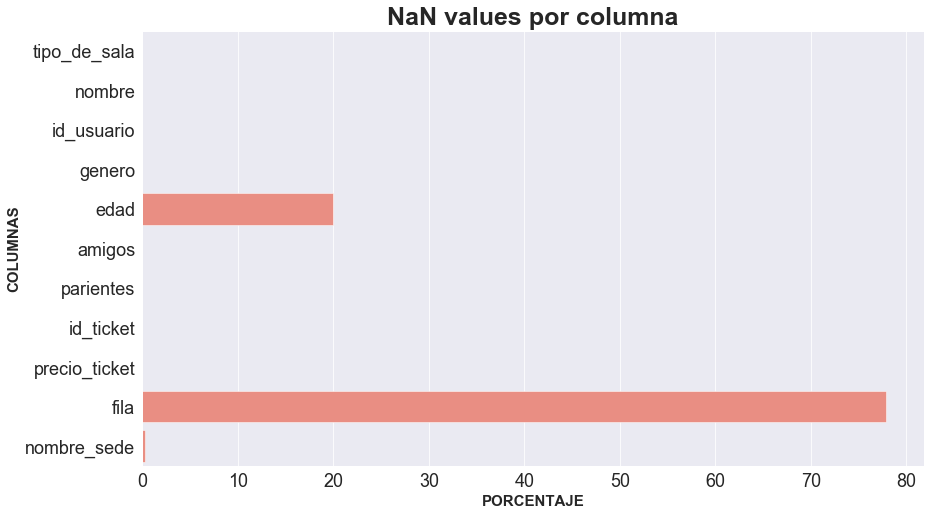

In [577]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_color_codes("pastel")
sns.set_style("darkgrid")
plt.title("NaN values por columna", fontweight = "bold", fontsize=25)
sns.barplot(x = df_NaN_Values, y = df_NaN_Values.index, color="salmon")
ax.set_xlabel('PORCENTAJE',fontsize=15, fontweight = "semibold");
ax.set_ylabel('COLUMNAS',fontsize=15, fontweight = "semibold");
ax.tick_params(labelsize=18)

Se puede apreciar que casi el 80% de los valores de la columna **fila** son nulos. Esto implica que cualquier informacion que se pueda obtener a partir de dicha columna no refleja la informacion que contiene el total del dataset. De modo que, cualquier conclusion a la que se arribara a partir de la columna FILA sera tomada con cautela.
En lo que respecta a la columna **edad**, si bien el porcentaje de datos nulos es considerable (alrededor de 20%), en relacion al total del set, podemos considerar que aquellas conclusiones que se obtienen a partir de la misma tendran relevancia al momento de generar *insights* sobre el total del dataset. Sin embargo, no se debe olvidar que lo que se puede concluir a partir de esta columna no refleja el total del dataset, sino un 80% del mismo.
Finalmente, el campo **nombre_sede** no contiene una cantidad significativa de valores nulos por lo que cualquier *insight*  que se obtenga a partir de la misma seran considerados como de igual peso que aquellas columnas que no tienen valores nulos.

### Analisis de features y target

En esta seccion, se analizara de forma paulatina la importancia de cada columna (*features*) y su relacion con el target, en este caso, la intencion de cada espectador de volver a una de las salas de FiuMark a ver Forzen 4. Se hara una valoracion de las columnas y de las categorias que pudiesen ayudar en la tarea de discriminar entre aquellos que volverian y aquellos que no. Cada segmentacion tiene como meta extraer **categorias** relevantes en este proceso predictivo.

In [578]:
# Preparacion del df
train_df_features_aux = train_df_features.drop('Unnamed: 0', axis = 1)
train_df_values_aux = train_df_values.drop('Unnamed: 0', axis = 1)
df_features_target = pd.merge(train_df_features_aux,train_df_values_aux, on = 'id_usuario')
df_features_target

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


<font color='blue'>**SEGMENTO: COLUMNA GENERO**</font>

In [579]:
df_genero_vs_target = pd.crosstab(df_features_target['genero'],df_features_target['volveria']).reset_index()
df_genero_vs_target['total'] = df_genero_vs_target [0] + df_genero_vs_target [1]
df_genero_vs_target

volveria,genero,0,1,total
0,hombre,419,94,513
1,mujer,75,213,288


In [580]:
# Convertimos valores a porcentajes
df_genero_vs_target ['no_percentage'] = (df_genero_vs_target [0])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['yes_percentage'] = (df_genero_vs_target [1])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['total_percentage']=100
del df_genero_vs_target[0]
del df_genero_vs_target[1]
del df_genero_vs_target['total']
df_genero_vs_target

volveria,genero,no_percentage,yes_percentage,total_percentage
0,hombre,81.676413,18.323587,100
1,mujer,26.041667,73.958333,100


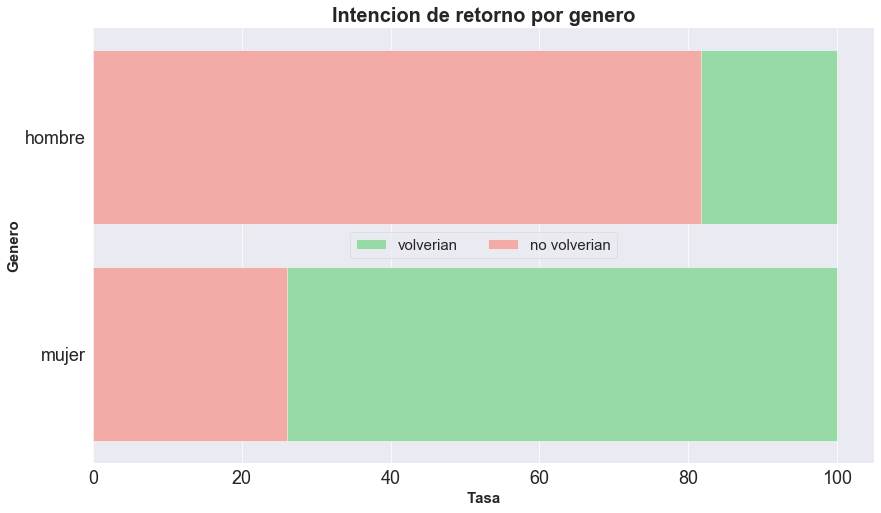

In [581]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'total_percentage', y = 'genero', data = df_genero_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'no_percentage', y = 'genero', data = df_genero_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Genero', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

La grafica revela que el porcentaje de mujeres que volverian a alguno de los cines de FiuMark supera ampliamente el porcentaje de los hombres, de modo que, de realizarse algun tipo de campaña comercial que promocione Frozen 4, debe considerarse que el publico femenino probablemente sea el mas receptivo.

Podemos analizar la misma informacion desde otro angulo: es este caso podriamos ver la proporcion de hombres vs la proporcion de mujeres que  volverian (o no) a alguno de los cines de FiuMark.

In [582]:
df_genero_and_target = df_features_target.copy()
df_genero_and_target.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1


In [583]:
df_genero_and_target = pd.crosstab(df_features_target['volveria'],df_features_target['genero']).reset_index()
df_genero_and_target['volveria'] = df_genero_and_target['volveria'].map({0: 'no volveria', 1: 'volveria'})
df_genero_and_target = df_genero_and_target.set_index('volveria')
df_genero_and_target

genero,hombre,mujer
volveria,,
no volveria,419,75
volveria,94,213


In [584]:
#convertimos a porcentajes
df_genero_and_target_porcentual= df_genero_and_target.div(df_genero_and_target.sum(axis=1), axis=0)
df_genero_and_target_porcentual

genero,hombre,mujer
volveria,,
no volveria,0.848178,0.151822
volveria,0.306189,0.693811


In [585]:
#Separamos la informacion por fila para crear los graficos asociados
df_genero_and_target_porcentual_no_volverian = df_genero_and_target_porcentual.iloc[0,:]
df_genero_and_target_porcentual_no_volverian
df_genero_and_target_porcentual_volverian = df_genero_and_target_porcentual.iloc[1,:]
df_genero_and_target_porcentual_volverian

genero
hombre    0.306189
mujer     0.693811
Name: volveria, dtype: float64

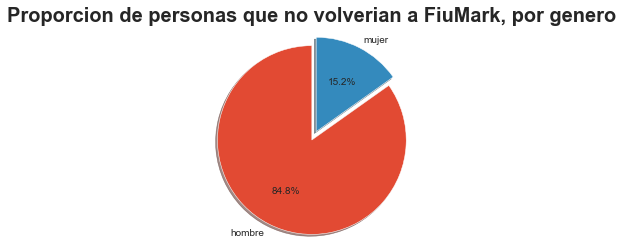

In [586]:
labels = 'hombre', 'mujer'
sns.set_color_codes("pastel")
sizes = [df_genero_and_target_porcentual.iloc[0,0], df_genero_and_target_porcentual.iloc[0,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que no volverian a FiuMark, por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

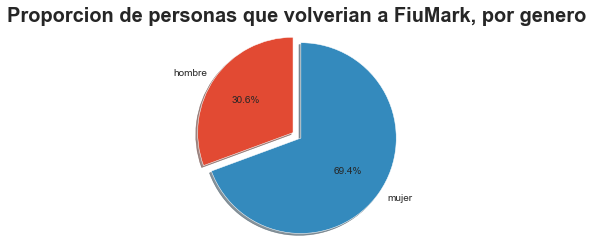

In [587]:
labels = 'hombre', 'mujer'
sns.set_color_codes("pastel")
sizes = [df_genero_and_target_porcentual.iloc[1,0], df_genero_and_target_porcentual.iloc[1,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que volverian a FiuMark, por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

Como se puede observar, y reforzando el analisis previo, el mayor porcentaje de personas que volverian a un cine FiuMark a ver Frozen 4 corresponde a las mujeres, a razon de 7 a 3. Por otro lado, los hombres no tienen intencion de volver a uno de estos cines a ver Frozen 4, con tasa 8 a 2 aproximadamente. Una observacion interesante es que el criterio para decidir quienes no volverian es mas fuerte que el criterio para decidir quienes si volverian, pues la diferencia porcentual entre los generos es mayor en el caso de los que no volverian.

<font color='blue'>**SEGMENTO: COLUMNA AMIGOS**</font>

In [588]:
df_amigos_vs_target = pd.crosstab(df_features_target['amigos'],df_features_target['volveria']).reset_index()
df_amigos_vs_target['total'] = df_amigos_vs_target [0] + df_amigos_vs_target [1]
df_amigos_vs_target

volveria,amigos,0,1,total
0,0,363,194,557
1,1,84,95,179
2,2,12,13,25
3,3,11,3,14
4,4,13,2,15
5,5,5,0,5
6,8,6,0,6


In [589]:
# Convertimos valores a porcentajes
df_amigos_vs_target ['no_percentage'] = (df_amigos_vs_target [0])*100/(df_amigos_vs_target['total'])
df_amigos_vs_target ['yes_percentage'] = (df_amigos_vs_target [1])*100/(df_amigos_vs_target['total'])
df_amigos_vs_target ['total_percentage']=100
del df_amigos_vs_target[0]
del df_amigos_vs_target[1]
del df_amigos_vs_target['total']
df_amigos_vs_target

volveria,amigos,no_percentage,yes_percentage,total_percentage
0,0,65.170557,34.829443,100
1,1,46.927374,53.072626,100
2,2,48.000000,52.000000,100
3,3,78.571429,21.428571,100
4,4,86.666667,13.333333,100
5,5,100.000000,0.000000,100
6,8,100.000000,0.000000,100


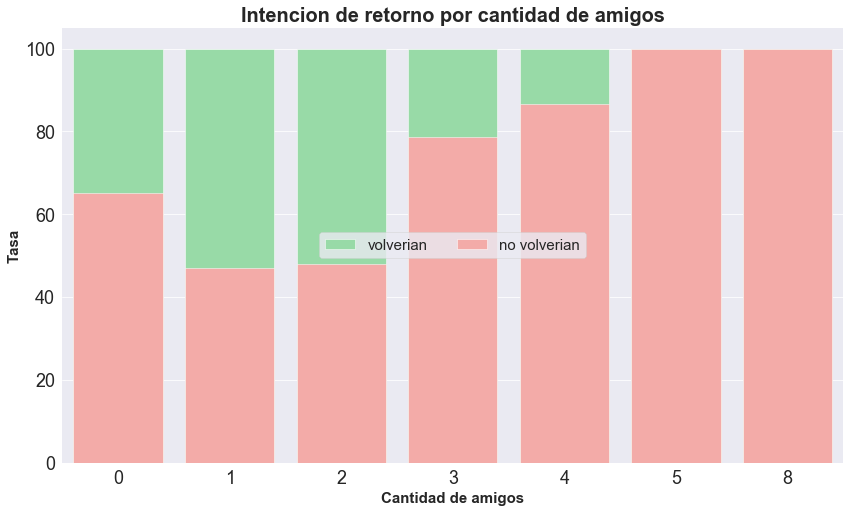

In [590]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'amigos', y = 'total_percentage', data = df_amigos_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'amigos', y = 'no_percentage', data = df_amigos_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Cantidad de amigos', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por cantidad de amigos', fontweight = 'semibold', fontsize = 20)
plt.show()

El diagrama de barras muestra claramente como aquellas personas que fueron a alguno de los cines de FiuMark en grupos numerosos (esto es, de 3 en adelante) son menos propensos a querer volver a uno de estos cines a ver Frozen 4. Por otro lado, para las personas que fueron solas o con no mas de 2 personas, la intencion de volver corresponde a la mitad. Una explicacion a este fenomeno puede ser que aquellos que van al cine en grupos numerosos lo hacen como salida de caracter social, independientemente de la pelicula que se vaya a proyectar o el cine al que asisten. De este modo, la intencion de volver a uno de los cines de FiuMark a ver una pelicula en especifico se mantiene muy baja, pues el objetivo de dicha salida grupal es mas de caracter social (lo que implica que tanto una salida al cine, una juntada en una cerveceria o salir a un boliche le resulta indiferente al grupo). 
Un comentario mas sobre la grafica. A partir de estos datos, el *feature* con mas peso, esto es, el que se puede usar para discriminar y obtener conclusiones robustas sobre quienen asistirian o no a un cine de FiuMark para ver Frozen 4, corresponde a los valores mayores a 3 amigos. En este caso, saber que una persona asistio a un cine con 3 o mas amigos puede ayudar a la firma a no considerar a estas personas como audiencia candidata para Frozen 4. La deduccion a partir de este set de datos resulta robusta. Por otro lado, la informacion que brindan aquellas personas que asistieron solas o con menos de 3 amigos puede resultar util pero no del todo robusta, lo cual puede afectar su utilidad al momento de categorizar. Para los que asistieron con 1 o 2 acompañantes, se puede ver que la mitad de estas personas indicaron que volverian y la otra mitad (aproximadamente) indico que no. De modo que si, por ejemplo, una persona asitio con un amigo, hay aproximadamente un 50% de probabilidad de que vuelva (en un espacio de probabilidad Laplaciano), lo cual no aporta informacion de interes para una campana publicitaria, por ejemplo (es decir, la variable "1 amigo" no permite concluir si volvera o no, el *insight* que aporta no es distinto al que aporta arrojar una moneda). 

Por otro lado, para los que asistieron solos, se puede predecir que la probabilidad de volver es baja, aunque los datos recabados no aportan la robustez que si aportan para los grupos de 5 o mas personas (las cantidades entre aquellos que asistirian y aquellos que no, no son muy distintas).

<font color='blue'>**SEGMENTO: COLUMNA PARIENTES**</font>

In [591]:
df_parientes_vs_target = pd.crosstab(df_features_target['parientes'],df_features_target['volveria']).reset_index()
df_parientes_vs_target['total'] = df_parientes_vs_target [0] + df_parientes_vs_target [1]
df_parientes_vs_target

volveria,parientes,0,1,total
0,0,398,209,607
1,1,50,60,110
2,2,36,34,70
3,3,2,3,5
4,4,4,0,4
5,5,3,1,4
6,6,1,0,1


In [592]:
# Convertimos valores a porcentajes
df_parientes_vs_target ['no_percentage'] = (df_parientes_vs_target [0])*100/(df_parientes_vs_target['total'])
df_parientes_vs_target ['yes_percentage'] = (df_parientes_vs_target [1])*100/(df_parientes_vs_target['total'])
df_parientes_vs_target ['total_percentage']=100
del df_parientes_vs_target[0]
del df_parientes_vs_target[1]
del df_parientes_vs_target['total']
df_parientes_vs_target

volveria,parientes,no_percentage,yes_percentage,total_percentage
0,0,65.568369,34.431631,100
1,1,45.454545,54.545455,100
2,2,51.428571,48.571429,100
3,3,40.000000,60.000000,100
4,4,100.000000,0.000000,100
5,5,75.000000,25.000000,100
6,6,100.000000,0.000000,100


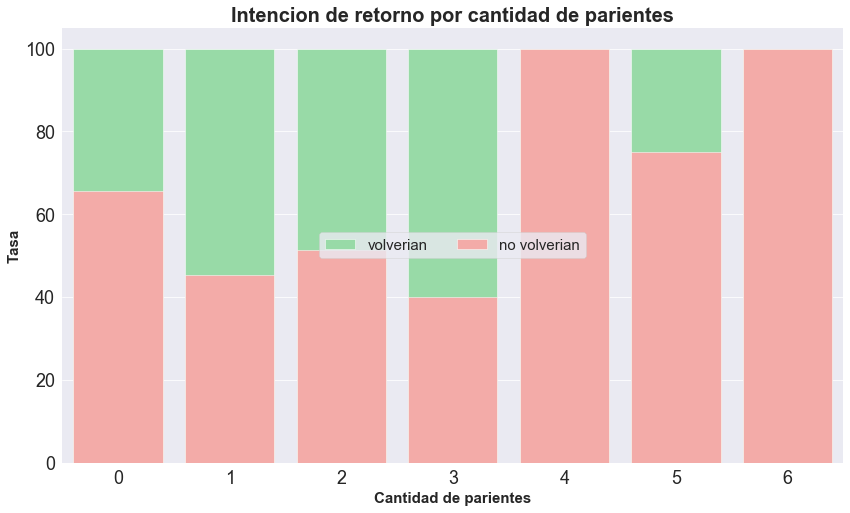

In [593]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'parientes', y = 'total_percentage', data = df_parientes_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'parientes', y = 'no_percentage', data = df_parientes_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Cantidad de parientes', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por cantidad de parientes', fontweight = 'semibold', fontsize = 20)
plt.show()

Un comentario necesario sobre este analisis y el referido a la segmentacion por cantidad de amigos es que, si bien estos grupos estan bien diferenciados (amigos y parientes son grupos distintos e independientes *a priori*) , el encuestado puede haber no aportado informacion totalmente veraz al momento de responder la pregunta "con quien asististe al cine?". El motivo detras de este comentario necesario es que puede ocurrir el caso de que en un grupo de personas (especialmente si el grupo es numeroso) amigos y parientes esten mezclados y no sea facil para el encuestado discriminar correctamente entre unos y otros, especialmente considerando que la tarea de completar una encuesta no suele ser del agrado del cliente.

Mas alla de este comentario, las conclusiones a las que se arribaron en el caso de la segmentacion por cantidad de parientes es similar a la de segmentacion por cantidad de amigos: los grupos grandes son los menos inclinados a volver a FiuMark a ver Frozen 4. La informacion que aportan los asistentes con 4 o 6 miembros familiares es determinante: ninguno de los encuestados volveria. 

Adicionalmente a la explicacion provista en el analisis anterior, no puede dejar de considerarse que existe la posibilidad de que las instalaciones de FiuMark tengan alguna caracteristica que hace que la experiencia para grupos numerosos no sea del todo placentera ni permite que los mismos se sientan comodos y a gusto. Esto quizas este relacionado a la experiencia en si y a lo que los grupos numerosos buscan en una salida de estas caracteristicas.

<font color='blue'>**SEGMENTO: COLUMNA NOMBRE_SEDE**</font>

In [594]:
df_nombre_sede_vs_target = pd.crosstab(df_features_target['nombre_sede'],df_features_target['volveria']).reset_index()
df_nombre_sede_vs_target['total'] = df_nombre_sede_vs_target [0] + df_nombre_sede_vs_target [1]
df_nombre_sede_vs_target

volveria,nombre_sede,0,1,total
0,fiumark_chacarita,66,83,149
1,fiumark_palermo,384,195,579
2,fiumark_quilmes,44,27,71


In [595]:
# Convertimos valores a porcentajes
df_nombre_sede_vs_target ['no_percentage'] = (df_nombre_sede_vs_target [0])*100/(df_nombre_sede_vs_target['total'])
df_nombre_sede_vs_target ['yes_percentage'] = (df_nombre_sede_vs_target [1])*100/(df_nombre_sede_vs_target['total'])
df_nombre_sede_vs_target ['total_percentage']=100
del df_nombre_sede_vs_target[0]
del df_nombre_sede_vs_target[1]
del df_nombre_sede_vs_target['total']
df_nombre_sede_vs_target

volveria,nombre_sede,no_percentage,yes_percentage,total_percentage
0,fiumark_chacarita,44.295302,55.704698,100
1,fiumark_palermo,66.321244,33.678756,100
2,fiumark_quilmes,61.971831,38.028169,100


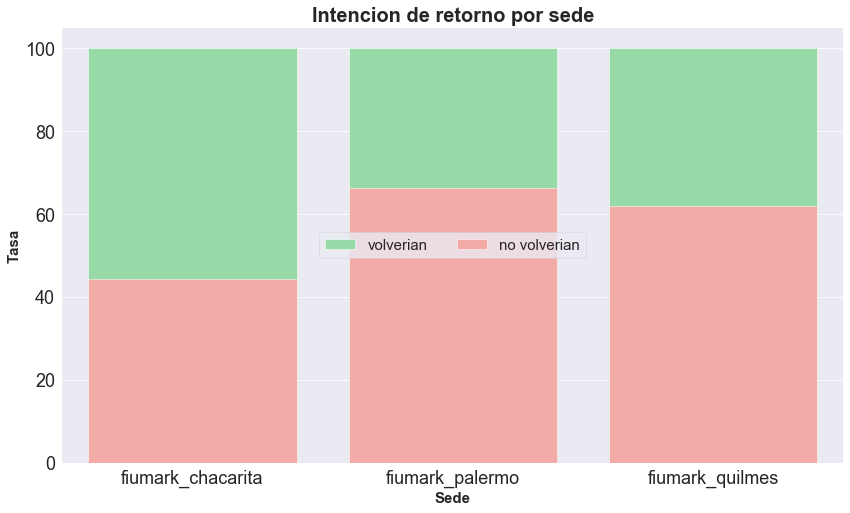

In [596]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'nombre_sede', y = 'total_percentage', data = df_nombre_sede_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'nombre_sede', y = 'no_percentage', data = df_nombre_sede_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Sede', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por sede', fontweight = 'semibold', fontsize = 20)
plt.show()

En este caso, el criterio para discriminar por sede es bastante parejo. Aparentemente las diferencias entre las instalaciones y la comodidad y el confort que aportan no son significativas, lo cual puede deducirse de la cercania entre los porcentajes de los 3 complejos. Hay que destacar, sin embargo, que la sede de Palermo es la que menos reincidencia del publico experimentaria en caso de cumplirse las encuestas. Por otro lado, aquellos asistentes al FiuMark de Chacarita son los mas dispuestos a volver al complejo a ver Frozen 4.
Un dato interesante tiene que ver con la cantidad de encuestados por complejo. Mientras que el total de encuestados en el FiuMark de Palermo fue de 579 personas, en Chacarita se encuestaron solo 149, lo que implica una diferencia porcentual de 400%. Esto quiere decir que se encuestaron mas personas en Palermo que en Chacarita, a razon de 4 a 1. Por que es esta informacion no menor? Como sabemos, por la Ley de los Grandes Numeros de estadistica, cuando la muestra (en este caso la cantidad de encuestados) es lo suficientemente grande, los resultados obtenidos converjen al valor promedio, que, en este caso, es el que refleja la "realidad" sobre la intencion de asistencia a ver Frozen 4. De modo que si bien los porcentajes obtenidos son correctos, los datos obtenidos en Palermo reflejan mejor la "realidad" sobre la intecion de volver a FiuMark a ver Frozen 4. Es imperativo que al momento de ponderar el *insight* que cada sede aporta, se considere esta caracteristica de las encuestas.

<font color='blue'>**SEGMENTO: COLUMNA PRECIO_TICKET**</font>

In [597]:
df_precio_ticket_vs_target = pd.crosstab(df_features_target['precio_ticket'],df_features_target['volveria']).reset_index()
df_precio_ticket_vs_target['total'] = df_precio_ticket_vs_target [0] + df_precio_ticket_vs_target [1]
df_precio_ticket_vs_target.columns = ['precio_ticket','no_volverian','volverian','total']
df_precio_ticket_vs_target.head()

,precio_ticket,no_volverian,volverian,total
0,1,254,59,313
1,2,92,73,165
2,3,68,60,128
3,4,27,17,44
4,5,11,4,15


In [598]:
df_precio_ticket_vs_target.head()

,precio_ticket,no_volverian,volverian,total
0,1,254,59,313
1,2,92,73,165
2,3,68,60,128
3,4,27,17,44
4,5,11,4,15


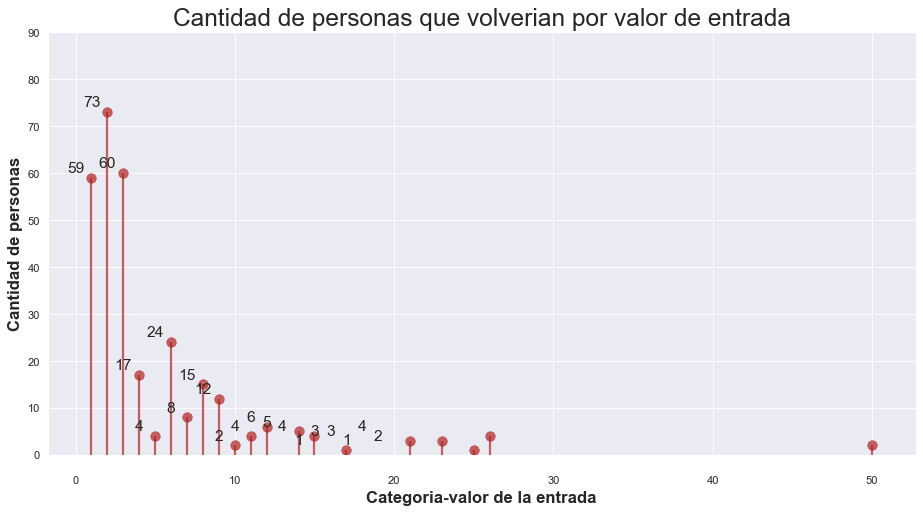

In [599]:
import pylab as pl
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=df_precio_ticket_vs_target.precio_ticket, ymin=0, ymax=df_precio_ticket_vs_target.volverian , color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_precio_ticket_vs_target.precio_ticket, y=df_precio_ticket_vs_target.volverian, s=75, color='firebrick', alpha=0.7)
ax.set_title('Cantidad de personas que volverian por valor de entrada', fontdict={'size':22})
ax.set_ylabel('Cantidad de personas', fontweight = 'semibold', fontsize = 15)
ax.set_xlabel('Categoria-valor de la entrada',fontweight = 'semibold', fontsize = 15)

ax.tick_params(axis='x', which='major', pad=15)
ax.set_ylim(0, 90)

# Annotate
for row in df_precio_ticket_vs_target.itertuples():
    ax.text(row.Index, row.volverian+.5, s=round(row.volverian, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

El grafico muestra que los compradores de las entradas mas baratas son aquellos con mayor disposicion a volver a algun cine de FiuMark a ver Frozen 4, en especial, los que adquirieron las entradas de las 3 categorias mas baratas. Se puede ver un decrecimiento de la forma:

\begin{equation*}
\frac{1}{k_1*x}
\end{equation*}
con x correspondiente al valor de la entrada y \begin{equation*} k_1>0 \end{equation*} 

Una informacion con la que NO contamos sobre el valore de las entradas es si las mismas contemplan *precios promocion* o solo remiten a valores regulares de las entradas. De conocer este dato, se deberia analizar que tan sensible resulta el publico a las promociones en las entradas.

Algo que llama poderosamente la atencion sobre la grafica es que, mientras que la categoria 1 y 3 tienen respuestas del publico similares, la categoria 2 sufre un salto significativo. Una informacion no disponible pero de interes es la que relaciona el valor de la entrada y el tipo de sala. Si la diferencia de confort y servicio entre la categoria mas baja de precios y la siguiente es significativa  - pero no ocurre asi con el precio - es de esperar que la cantidad de aquellos que concurrieron a los cines de precios correspondientes a la segunda categoria sea mayor a la primera categoria. Un razonamiento analogo puede realizarse entre el segundo rango de precios y el tercero (en este caso, la diferencia de confort y servicio entre la categoria 2 y 3 es infima pero no es asi con el precio).

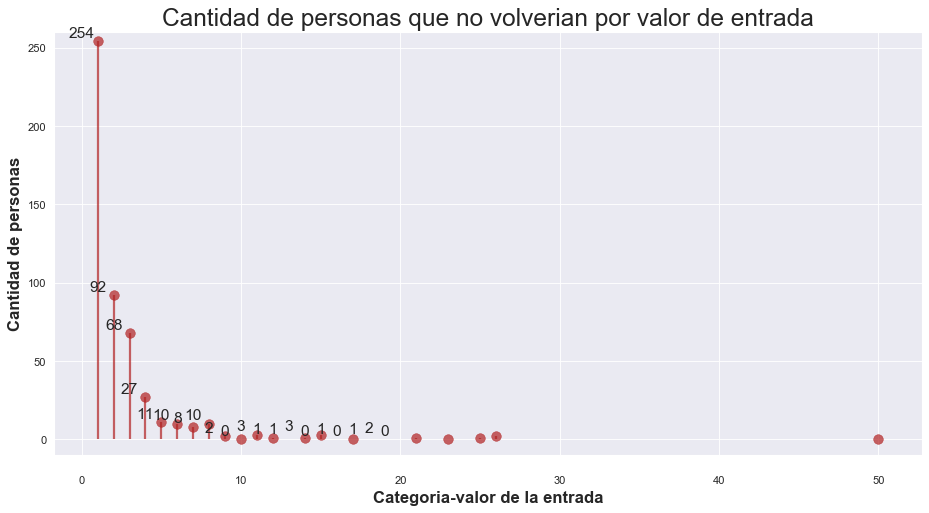

In [600]:
import pylab as pl
# Draw plot
#pl.rcParams['xtick.major.pad']='8'
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=df_precio_ticket_vs_target.precio_ticket, ymin=0, ymax=df_precio_ticket_vs_target.no_volverian , color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_precio_ticket_vs_target.precio_ticket, y=df_precio_ticket_vs_target.no_volverian, s=75, color='firebrick', alpha=0.7)
ax.set_title('Cantidad de personas que no volverian por valor de entrada', fontdict={'size':22})
ax.set_ylabel('Cantidad de personas', fontweight = 'semibold', fontsize = 15)
ax.set_xlabel('Categoria-valor de la entrada',fontweight = 'semibold', fontsize = 15)

ax.tick_params(axis='x', which='major', pad=15)
ax.set_ylim(-10, 260)

# Annotate
for row in df_precio_ticket_vs_target.itertuples():
    ax.text(row.Index, row.no_volverian+.5, s=round(row.no_volverian, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

En este grafico, resulta interesante que aquellos que compraron la entrada mas barata son los menos dispuestos a volver a algun cine de FiuMark a ver Frozen 4. La diferencia absoluta con respecto al segundo grupo de menor disposicion a retornar es del 276%, lo cual resulta abismal. Una posible explicacion es que las personas que adquirieron dicha entrada lo hicieron a traves de alguna promocion o descuento ocasional, es decir, no son habitues de los cines de FiuMark, por lo que volver no es posible. Otra posibilidad es que la relacion precio-calidad de las entradas mas baratos sea mala y, por tanto, la experiencia en uno de los cines no admite reincidencia.

Mas alla de este fenomeno, podemos ver que el decrecimiento de la grafica toma la forma:

\begin{equation*}
\frac{1}{k_2*x}
\end{equation*}
con x correspondiente al valor de la entrada y \begin{equation*} k_2>0 \end{equation*} 

Si aunamos el analisis de aquellos que volverian y de los que no (por categoria de entrada), y asociamos la notacion del comportamiento de ambas graficas observamos que la tasa de caida en la intencion de reincidencia es mucho mayor en este caso que en el caso de los que si volverian, es decir:
\begin{equation*} k_2>k_1 \end{equation*} 

De esta comparacion concluimos que, en ambos casos (volverian *vs* no volverian), a medida que el precio de las entradas aumenta, la intencion de **retorno** y de **no retorno** cae en las formas antes descriptas, con mayor ritmo de caida en el caso de los que no volverian.

Sin embargo, es necesario detectar cuan bruscamente cambia el comportamiento para las dos situaciones. Si la caida es tal que k<sub>2</sub> > k<sub>1</sub> pero k<sub>2</sub> no es mucho mayor que k<sub>1</sub>, entonces ninguna categoria aporta algun *insight* significativo, pues al tener ambas graficas comportamientos similares, entonces la proporcion de **volver** o **no volver** es semejante. Ahora bien, si k<sub>2</sub> es mucho mayor que k<sub>1</sub>, entonces podrian usarse los datos para inferir que a medida que los precios de las entradas suben, el cliente es mas propenso a volver. A fin de resolver esta dicotomia, planteamos un nuevo grafico que compare ambas situaciones.

((Comentario necesario sobre estos dos graficos anteriores: El grueso de los datos para ambos casos se concentran para las categorias mas bajas de precios y, por lo tanto, son los que aportan mayor robustez a las conclusiones a las que se pudieran arribar a partir de los mismos. Luego, en caso de arribar a algun tipo de conclusion sobre los precios mas altos, se debe recordar que son unicamente las primeras categorias las que acumulan mayor cantidad de datos.))

In [601]:
df_precio_ticket_vs_target.head()

,precio_ticket,no_volverian,volverian,total
0,1,254,59,313
1,2,92,73,165
2,3,68,60,128
3,4,27,17,44
4,5,11,4,15


In [602]:
# Convertimos valores a porcentajes
df_precio_ticket_vs_target ['no volverian_per'] = (df_precio_ticket_vs_target ['no_volverian'])*100/(df_precio_ticket_vs_target['total'])
df_precio_ticket_vs_target ['volverian_per'] = (df_precio_ticket_vs_target ['volverian'])*100/(df_precio_ticket_vs_target['total'])
del df_precio_ticket_vs_target['no_volverian']
del df_precio_ticket_vs_target['volverian']
del df_precio_ticket_vs_target['total']
df_precio_ticket_vs_target.head()

,precio_ticket,no volverian_per,volverian_per
0,1,81.150160,18.849840
1,2,55.757576,44.242424
2,3,53.125000,46.875000
3,4,61.363636,38.636364
4,5,73.333333,26.666667


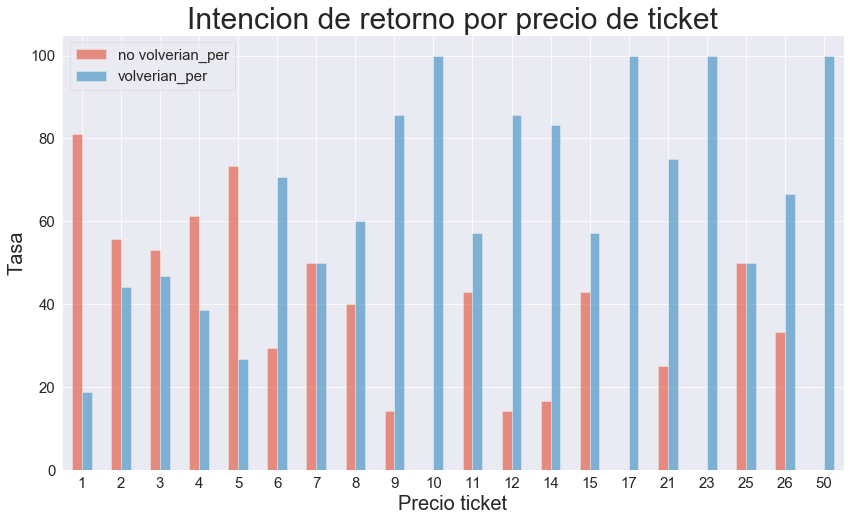

In [603]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
ax = df_precio_ticket_vs_target.plot.bar(figsize = (14,8), fontsize = 15, x='precio_ticket',alpha=0.6, rot=0)
ax.set_xlabel('Precio ticket', fontsize = 20)
ax.set_ylabel('Tasa', fontsize = 20)
ax.set_title('Intencion de retorno por precio de ticket', fontsize = 30)
ax.legend(fontsize = 15)

Este grafico derivado del mismo set de datos anterior (mismo *feature*) permite comprender que es lo que ocurre entre los clientes que adquirieron entradas de distintos precios y sus intenciones de retorno: El mayor porcentaje de personas que volverian se ubica en las categorias mas caras (esto es, a partir de la categoria 6 inclusive). De modo que si unificamos criterios con el analisis previo, podemos decir que para la curva de clientes que **volverian**, a saber,
\begin{equation*}
\frac{1}{k_1*x}
\end{equation*}
y para la curva de clientes que **no volverian**, es decir,
\begin{equation*}
\frac{1}{k_2*x}
\end{equation*}
resulta 
\begin{equation*} k_2>k_1 \end{equation*}
Y podemos ver a partir de esta ultima grafica que 
\begin{equation*} k_2>>k_1 \end{equation*}
De este modo podemos concluir que los clientes que adquirieron una entrada de categoria 1 no volverian a alguno de los cines de FiuMark. 


Ahora bien, con respecto a las categorias 2, 3, 4 y 5, es evidente que
\begin{equation*} k_2>k_1 \end{equation*}
pero no con una diferencia porcentual significativa, tal como ocurre para la categoria 1. De modo que el paramentro no resulta fiable para discriminar.

En lo que respecta a las categorias superiores, todas registran mayores porcentajes de candidatos a volver que a no hacerlo. No obstante, como se pudo apreciar en las dos graficas anteriores, la cantidad de datos recopilada es demasiado baja para predecir si una persona con caracteristicas similares volveria a ver Frozen 4.

<font color='blue'>**SEGMENTO: COLUMNA EDAD**</font>

In [604]:
df_edad_vs_target = df_features_target[['edad', 'volveria']]
df_edad_vs_target_not_null = df_edad_vs_target.dropna()
df_edad_vs_target_not_null.head()

,edad,volveria
0,73.5,0
1,35.0,0
4,4.0,1
7,32.0,0
8,41.0,1


In [605]:
df_edad_vs_target_volverian = df_edad_vs_target_not_null[df_edad_vs_target_not_null['volveria']==1]
df_edad_vs_target_volverian.head()

,edad,volveria
4,4.0,1
8,41.0,1
9,59.0,1
13,45.0,1
14,29.0,1


In [606]:
df_edad_vs_target_no_volverian = df_edad_vs_target_not_null[df_edad_vs_target_not_null['volveria']==0]
df_edad_vs_target_no_volverian.head()

,edad,volveria
0,73.5,0
1,35.0,0
7,32.0,0
10,43.5,0
11,27.0,0


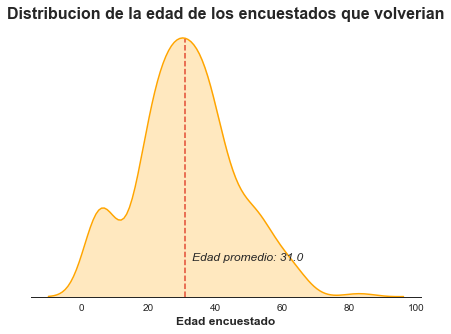

In [607]:
sns.set_style('white')
plt.figure(figsize = (7,5))
sns.distplot(df_edad_vs_target_volverian.edad, color = 'orange', kde_kws = {'shade':True}, hist = False)
plt.axvline(df_edad_vs_target_volverian.edad.median(), ymax = 0.95, linestyle = '--')
sns.despine(left = True)
plt.yticks([])
plt.text(df_edad_vs_target_volverian.edad.median() + 2, 0.004, "Edad promedio: " + str(df_edad_vs_target_volverian.edad.median()), 
         style = 'italic', fontsize = 12)
plt.xlabel("Edad encuestado", fontsize = 12, fontweight = 'semibold')
plt.title('Distribucion de la edad de los encuestados que volverian', fontsize = 16, fontweight = 'semibold')
plt.show()

La probabilidad asociada de la edad de los encuestados que vovlerian muestran que el grupo candidato se concetra entre 20 y 50 años aproximadamente. 

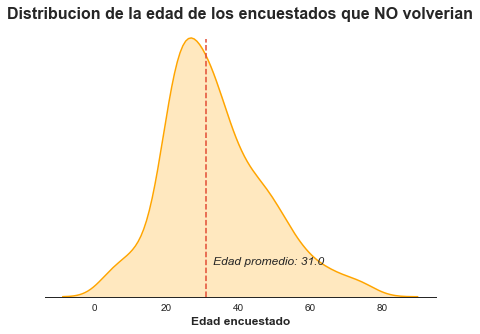

In [608]:
sns.set_style('white')
plt.figure(figsize = (7,5))
sns.distplot(df_edad_vs_target_no_volverian.edad, color = 'orange', kde_kws = {'shade':True}, hist = False)
plt.axvline(df_edad_vs_target_no_volverian.edad.median(), ymax = 0.95, linestyle = '--')
sns.despine(left = True)
plt.yticks([])
plt.text(df_edad_vs_target_no_volverian.edad.median() + 2, 0.004, "Edad promedio: " + str(df_edad_vs_target_no_volverian.edad.median()), 
         style = 'italic', fontsize = 12)
plt.xlabel("Edad encuestado", fontsize = 12, fontweight = 'semibold')
plt.title('Distribucion de la edad de los encuestados que NO volverian', fontsize = 16, fontweight = 'semibold')
plt.show()

Al igual que la distribucion anterior, la probabilidad asociada a la edad de los encuestados que NO volverian TAMBIEN se concentran entre 20 y 50 anos aproximadamente. Esto genera un problema al momento de elegir este rango de edad para arribar a alguna conclusion (en este caso, si asistirian o no). Dicho problema estriba en el hecho de que en este rango de edad, tenemos probabilidades similares de que asistan o no a la proxima pelicula de Frozen, y esto no es mejor probabilidad que la que aporta  arrojar una moneda para decidir.
Por otro lado, se pueden analizar otros rangos de edades y ver si aportan *insights* relevantes. Por ejemplo, vemos que en las edades que van de 0 a 20 años, se acumula mas probabilidad para los que volverian que para los que no volverian. Hay que recordar, no obstante, que los encuestados en este rango son niños y niñas y su decicion de volver quedara circunscripta a la voluntad de sus padres y/o tutores.
Finalmente, en el rango de mayores de 60, las probabilidades acumuladas son similares.
En conclusion, el analisis del *feature* **edad** parece no aportar datos relevantes *per se* a la pregunta de si volverian (o no) a uno de los cines de FiuMark a ver Frozen 4.

A fin de realizar un analisis exhaustivo en lo que respecta a la intencion de volver a FiuMark de los distintos grupos de edades, se particiono el conjunto de encuestados para analizar probabilidades, tomando franjas de edad de 10 años.

**Creamos los grupos de edades tomados de a 10 años**

In [609]:
df_grupos_edad_vs_target = df_features_target[['edad','volveria']]
df_grupos_edad_vs_target = df_grupos_edad_vs_target.dropna()
df_grupos_edad_vs_target.head()

,edad,volveria
0,73.5,0
1,35.0,0
4,4.0,1
7,32.0,0
8,41.0,1


In [610]:
#Funcion uniformizadora: uniformiza los df's para concatenarlos todos a un df final segmentado por grupos de edades
def uniformizacion (df):
    df['volverian'] = df.iloc[1,1]
    df ['no_volverian'] = df.iloc[0,1]
    del df['volveria']
    df.iloc[:,0] = df.columns[0]
    df = df.rename(columns = {df.columns[0]:'grupo'})#, inplace = True)
    df = df.drop_duplicates()
    return df

In [611]:
# GRUPO 1: 0 - 10
df_grupos_edad_vs_target_grupo_uno= df_grupos_edad_vs_target.loc[df_grupos_edad_vs_target['edad']<10]
df_grupos_edad_vs_target_grupo_uno.head()

,edad,volveria
4,4.00,1
21,7.00,1
38,4.00,1
50,3.83,1
65,4.00,1


In [612]:
df_grupos_edad_vs_target_grupo_uno ['0_a_10'] = 1
df_grupos_edad_vs_target_grupo_uno_short = df_grupos_edad_vs_target_grupo_uno [['volveria','0_a_10']]
df_grupos_edad_vs_target_grupo_uno_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,0_a_10
4,1,1
21,1,1
38,1,1
50,1,1
65,1,1


In [613]:
df_grupos_edad_vs_target_grupo_uno_final = df_grupos_edad_vs_target_grupo_uno_short.groupby('volveria')['0_a_10'].agg('sum')
df_grupos_edad_vs_target_grupo_uno_final = df_grupos_edad_vs_target_grupo_uno_final.reset_index()
df_grupos_edad_vs_target_grupo_uno_final.head()

,volveria,0_a_10
0,0,11
1,1,28


In [614]:
grupo_uno = uniformizacion(df_grupos_edad_vs_target_grupo_uno_final)
grupo_uno

,grupo,volverian,no_volverian
0,0_a_10,28,11


In [615]:
# GRUPO 2: entre 10 - 20
df_grupos_edad_vs_target_grupo_dos= df_grupos_edad_vs_target.loc[(df_grupos_edad_vs_target['edad']>10) & (df_grupos_edad_vs_target['edad']<20)]
df_grupos_edad_vs_target_grupo_dos.head()

,edad,volveria
24,11.0,0
27,15.0,1
31,19.0,0
53,12.0,1
66,11.0,1


In [616]:
df_grupos_edad_vs_target_grupo_dos ['10_a_20'] = 1
df_grupos_edad_vs_target_grupo_dos_short = df_grupos_edad_vs_target_grupo_dos [['volveria','10_a_20']]
df_grupos_edad_vs_target_grupo_dos_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,10_a_20
24,0,1
27,1,1
31,0,1
53,1,1
66,1,1


In [617]:
df_grupos_edad_vs_target_grupo_dos_final = df_grupos_edad_vs_target_grupo_dos_short.groupby('volveria')['10_a_20'].agg('sum')
df_grupos_edad_vs_target_grupo_dos_final = df_grupos_edad_vs_target_grupo_dos_final.reset_index()
df_grupos_edad_vs_target_grupo_dos_final.head()

,volveria,10_a_20
0,0,28
1,1,18


In [618]:
grupo_dos = uniformizacion(df_grupos_edad_vs_target_grupo_dos_final)
grupo_dos

,grupo,volverian,no_volverian
0,10_a_20,18,28


In [619]:
# GRUPO 3: entre 20 - 30
df_grupos_edad_vs_target_grupo_tres= df_grupos_edad_vs_target.loc[(df_grupos_edad_vs_target['edad']>20) & (df_grupos_edad_vs_target['edad']<30)]
df_grupos_edad_vs_target_grupo_tres.head()

,edad,volveria
11,27.0,0
14,29.0,1
17,24.0,1
18,22.0,0
19,28.0,1


In [620]:
df_grupos_edad_vs_target_grupo_tres ['20_a_30'] = 1
df_grupos_edad_vs_target_grupo_tres_short = df_grupos_edad_vs_target_grupo_tres [['volveria','20_a_30']]
df_grupos_edad_vs_target_grupo_tres_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,20_a_30
11,0,1
14,1,1
17,1,1
18,0,1
19,1,1


In [621]:
df_grupos_edad_vs_target_grupo_tres_final = df_grupos_edad_vs_target_grupo_tres_short.groupby('volveria')['20_a_30'].agg('sum')
df_grupos_edad_vs_target_grupo_tres_final = df_grupos_edad_vs_target_grupo_tres_final.reset_index()
df_grupos_edad_vs_target_grupo_tres_final.head()

,volveria,20_a_30
0,0,124
1,1,64


In [622]:
grupo_tres = uniformizacion(df_grupos_edad_vs_target_grupo_tres_final)
grupo_tres

,grupo,volverian,no_volverian
0,20_a_30,64,124


In [623]:
# GRUPO 4: entre 30 - 40
df_grupos_edad_vs_target_grupo_cuatro= df_grupos_edad_vs_target.loc[(df_grupos_edad_vs_target['edad']>30) & (df_grupos_edad_vs_target['edad']<40)]
df_grupos_edad_vs_target_grupo_cuatro.head()

,edad,volveria
1,35.0,0
7,32.0,0
12,33.5,0
28,33.5,0
29,39.0,0


In [624]:
df_grupos_edad_vs_target_grupo_cuatro ['30_a_40'] = 1
df_grupos_edad_vs_target_grupo_cuatro_short = df_grupos_edad_vs_target_grupo_cuatro [['volveria','30_a_40']]
df_grupos_edad_vs_target_grupo_cuatro_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,30_a_40
1,0,1
7,0,1
12,0,1
28,0,1
29,0,1


In [625]:
df_grupos_edad_vs_target_grupo_cuatro_final = df_grupos_edad_vs_target_grupo_cuatro_short.groupby('volveria')['30_a_40'].agg('sum')
df_grupos_edad_vs_target_grupo_cuatro_final = df_grupos_edad_vs_target_grupo_cuatro_final.reset_index()
df_grupos_edad_vs_target_grupo_cuatro_final.head()

,volveria,30_a_40
0,0,95
1,1,70


In [626]:
grupo_cuatro = uniformizacion(df_grupos_edad_vs_target_grupo_cuatro_final)
grupo_cuatro

,grupo,volverian,no_volverian
0,30_a_40,70,95


In [627]:
# GRUPO 5: entre 40 - 50
df_grupos_edad_vs_target_grupo_cinco= df_grupos_edad_vs_target.loc[(df_grupos_edad_vs_target['edad']>40) & (df_grupos_edad_vs_target['edad']<50)]
df_grupos_edad_vs_target_grupo_cinco.head()

,edad,volveria
8,41.0,1
10,43.5,0
13,45.0,1
23,41.0,1
25,46.0,0


In [628]:
df_grupos_edad_vs_target_grupo_cinco ['40_a_50'] = 1
df_grupos_edad_vs_target_grupo_cinco_short = df_grupos_edad_vs_target_grupo_cinco [['volveria','40_a_50']]
df_grupos_edad_vs_target_grupo_cinco_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,40_a_50
8,1,1
10,0,1
13,1,1
23,1,1
25,0,1


In [629]:
df_grupos_edad_vs_target_grupo_cinco_final = df_grupos_edad_vs_target_grupo_cinco_short.groupby('volveria')['40_a_50'].agg('sum')
df_grupos_edad_vs_target_grupo_cinco_final = df_grupos_edad_vs_target_grupo_cinco_final.reset_index()
df_grupos_edad_vs_target_grupo_cinco_final.head()

,volveria,40_a_50
0,0,51
1,1,30


In [630]:
grupo_cinco = uniformizacion(df_grupos_edad_vs_target_grupo_cinco_final)
grupo_cinco

,grupo,volverian,no_volverian
0,40_a_50,30,51


In [631]:
# GRUPO 6: entre 50 - 60
df_grupos_edad_vs_target_grupo_seis= df_grupos_edad_vs_target.loc[(df_grupos_edad_vs_target['edad']>50) & (df_grupos_edad_vs_target['edad']<60)]
df_grupos_edad_vs_target_grupo_seis.head()

,edad,volveria
9,59.0,1
22,58.5,0
32,54.0,0
36,53.0,1
43,52.0,0


In [632]:
df_grupos_edad_vs_target_grupo_seis ['50_a_60'] = 1
df_grupos_edad_vs_target_grupo_seis_short = df_grupos_edad_vs_target_grupo_seis [['volveria','50_a_60']]
df_grupos_edad_vs_target_grupo_seis_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,50_a_60
9,1,1
22,0,1
32,0,1
36,1,1
43,0,1


In [633]:
df_grupos_edad_vs_target_grupo_seis_final = df_grupos_edad_vs_target_grupo_seis_short.groupby('volveria')['50_a_60'].agg('sum')
df_grupos_edad_vs_target_grupo_seis_final = df_grupos_edad_vs_target_grupo_seis_final.reset_index()
df_grupos_edad_vs_target_grupo_seis_final.head()

,volveria,50_a_60
0,0,26
1,1,23


In [634]:
grupo_seis = uniformizacion(df_grupos_edad_vs_target_grupo_seis_final)
grupo_seis

,grupo,volverian,no_volverian
0,50_a_60,23,26


In [635]:
# GRUPO 7: mayores a 60
df_grupos_edad_vs_target_grupo_siete= df_grupos_edad_vs_target.loc[df_grupos_edad_vs_target['edad']>60]
df_grupos_edad_vs_target_grupo_siete.head()

,edad,volveria
0,73.5,0
62,61.0,1
97,62.0,0
101,61.0,0
112,61.0,0


In [636]:
df_grupos_edad_vs_target_grupo_siete ['mayor_de_60'] = 1
df_grupos_edad_vs_target_grupo_siete_short = df_grupos_edad_vs_target_grupo_siete [['volveria','mayor_de_60']]
df_grupos_edad_vs_target_grupo_siete_short.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volveria,mayor_de_60
0,0,1
62,1,1
97,0,1
101,0,1
112,0,1


In [637]:
df_grupos_edad_vs_target_grupo_siete_final = df_grupos_edad_vs_target_grupo_siete_short.groupby('volveria')['mayor_de_60'].agg('sum')
df_grupos_edad_vs_target_grupo_siete_final = df_grupos_edad_vs_target_grupo_siete_final.reset_index()
df_grupos_edad_vs_target_grupo_siete_final.head()

,volveria,mayor_de_60
0,0,19
1,1,9


In [638]:
grupo_siete = uniformizacion(df_grupos_edad_vs_target_grupo_siete_final)
grupo_siete

,grupo,volverian,no_volverian
0,mayor_de_60,9,19


In [639]:
franjas_edades_vs_target = pd.concat([grupo_uno, grupo_dos, grupo_tres, grupo_cuatro, grupo_cinco, grupo_seis, grupo_siete])
franjas_edades_vs_target ['total'] = franjas_edades_vs_target['volverian'] + franjas_edades_vs_target['no_volverian']
franjas_edades_vs_target

,grupo,volverian,no_volverian,total
0,0_a_10,28,11,39
0,10_a_20,18,28,46
0,20_a_30,64,124,188
0,30_a_40,70,95,165
0,40_a_50,30,51,81
0,50_a_60,23,26,49
0,mayor_de_60,9,19,28


OBSERVACION IMPORTANTE: La cantidad de encuestados por grupos refleja diferencias significativas. Como se indico con anterioridad, la cantidad de encuestados es crucial para converger al valor promedio de la poblacion. En este caso particular, diremos que los datos que aportan las categorias **20_a_30**, **30_a_40** y **40_a_50** se acercan mejor a los valores reales que las demas categorias.

In [640]:
# Convertimos valores a porcentajes
franjas_edades_vs_target['volveria_percentage'] = franjas_edades_vs_target['volverian']*100/(franjas_edades_vs_target['volverian']+ franjas_edades_vs_target['no_volverian'])
franjas_edades_vs_target['no_volveria_percentage'] = franjas_edades_vs_target['no_volverian']*100/(franjas_edades_vs_target['volverian']+ franjas_edades_vs_target['no_volverian'])
franjas_edades_vs_target['total'] = 100
del franjas_edades_vs_target['volverian']
del franjas_edades_vs_target['no_volverian']

franjas_edades_vs_target.head()

,grupo,total,volveria_percentage,no_volveria_percentage
0,0_a_10,100,71.794872,28.205128
0,10_a_20,100,39.130435,60.869565
0,20_a_30,100,34.042553,65.957447
0,30_a_40,100,42.424242,57.575758
0,40_a_50,100,37.037037,62.962963


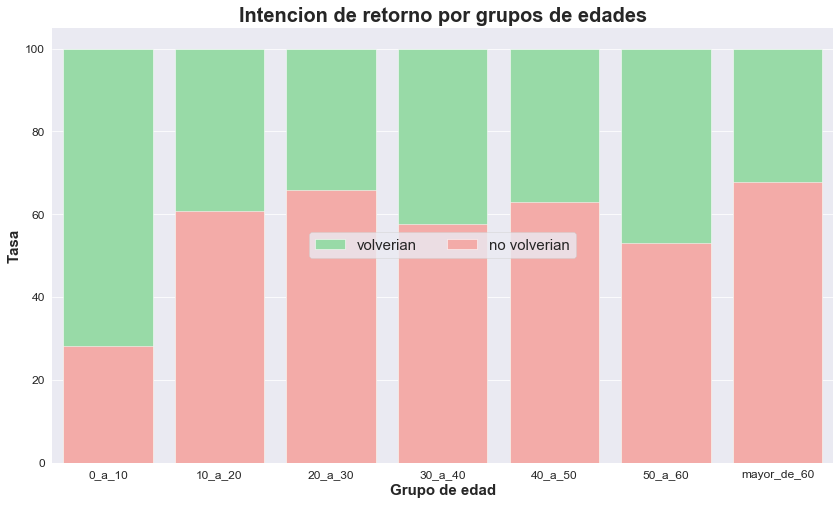

In [641]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'grupo', y = 'total', data = franjas_edades_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'grupo', y = 'no_volveria_percentage', data = franjas_edades_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=12)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Grupo de edad', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por grupos de edades', fontweight = 'semibold', fontsize = 20)
plt.show()

En este nuevo analisis (que considera el comentario hecho algunas celdas arriba sobre la cantidad de escuestados para cada grupo), vemos que la informacion que obtenemos del mismo resulta significativo. Por un lado nos apegamos a las conclusiones anteriores en lo que respecta al primer grupo (de 0 a 10) en donde se ve claramente que la intencion de volver supera ampliamente a su contraparte a razon de 7 a 3 aproximadamente. En los demas casos, nos topamos con distintos casos que merecen la pena estudiar. En relacion al grupo de 10 a 20 años, un 60% no tiene intencion de volver. No obstante, este valor porcentual no es robusto al momento de definir si dicho grupo es candidato a volver pues, 60% implica que un poco menos de la mitad desea volver y un poco mas de la mitad no desea volver. El parametro resulta debil es esta situacion. Algo similar ocurre con los grupos **30_a_40** años y **40_a_50** años. Siguiendo con esta linea argumental, un caso extremo lo hallamos para el grupo **50_a_60** años, cuya probabilidad roza el 50%. Este hecho indica que dada una persona de edad comprendida entre los 50 y los 60 años, es imposible estimar si la persona volvera o no. En los grupo de 20 a 30 años y el grupo de mayores de 60 años, sus miembros estan mas inclinados a no repetir la experiencia en uno de los cines de FiuMark, aunque no puede saberse si esta decision esta vinculada a la calidad y el confort de los cines o a la pelicula en si, en este caso Frozen 4.

<font color='blue'>**SEGMENTO: COLUMNA TIPO_DE_SALA**</font>

In [642]:
df_tipo_sala_vs_target = pd.crosstab(df_features_target['tipo_de_sala'],df_features_target['volveria']).reset_index()
df_tipo_sala_vs_target['total'] = df_tipo_sala_vs_target [0] + df_tipo_sala_vs_target [1]
df_tipo_sala_vs_target = df_tipo_sala_vs_target.rename(columns={0: "no_volverian", 1: "volverian"})
df_tipo_sala_vs_target_aux = df_tipo_sala_vs_target
df_tipo_sala_vs_target

volveria,tipo_de_sala,no_volverian,volverian,total
0,3d,85,82,167
1,4d,342,105,447
2,normal,67,120,187


Proporcion de encuestados en cada grupo:
- 447 de los encuestados corresponden a 4D
- 167 encuestados pertenecen a 3D, lo cual representa solo un 37% de los encuestados en salas 4D
- 187 encuestados pertenecea a salas normales. Estos son el 42% de los encuestados en salas 4D
Esta informacion sera relevante al momento de ponderar la robustez del *insight* que cada tipo de sala brinda.

In [643]:
# Convertimos valores a porcentajes
df_tipo_sala_vs_target['volveria_percentage'] = df_tipo_sala_vs_target['volverian']*100/(df_tipo_sala_vs_target['volverian']+ df_tipo_sala_vs_target['no_volverian'])
df_tipo_sala_vs_target['no_volveria_percentage'] = df_tipo_sala_vs_target['no_volverian']*100/(df_tipo_sala_vs_target['volverian']+ df_tipo_sala_vs_target['no_volverian'])
df_tipo_sala_vs_target['total'] = 100
del df_tipo_sala_vs_target['volverian']
del df_tipo_sala_vs_target['no_volverian']

df_tipo_sala_vs_target.head()

volveria,tipo_de_sala,total,volveria_percentage,no_volveria_percentage
0,3d,100,49.101796,50.898204
1,4d,100,23.489933,76.510067
2,normal,100,64.171123,35.828877


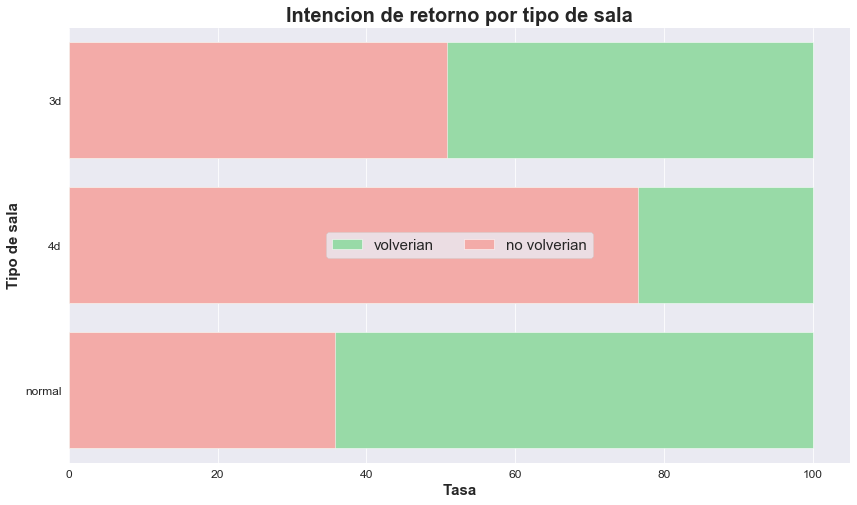

In [644]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'total', y = 'tipo_de_sala', data = df_tipo_sala_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'no_volveria_percentage', y = 'tipo_de_sala', data = df_tipo_sala_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=12)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Tasa', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Tipo de sala', fontweight = 'semibold', fontsize = 15)
plt.title ('Intencion de retorno por tipo de sala', fontweight = 'semibold', fontsize = 20)
plt.show()

(El siguiente desarrollo se realiza considerando el analisis de la cantidad de encuestados hecha apenas una celdas arriba).
En el caso de las salas 3D, la proporcion entre candidatos a volver y a no volver a uno de los cines de FiuMark para ver Frozen 4 es muy similar, por lo que esta categoria no constituye un buen parametro para predecir si los miembros de dicho grupo volveran o no. 
Los que asistieron a una sala 4D, son candidatos a no volver a razon de 8 a 2 aproximadamente mientras los que miraron una pelicula en las salas regulares son mayormente candidatos a volver a razon de 6.5 a 3.5 aproximadamente.
Puede resultar util emplear estos dos ultimos parametros como categorias para predecir el grupo de personas que no volverian y que volverian a uno de los cines respectivamente.

## DEPENDENCIAS ENTRE FEATURES Y ANALISIS DE *TARGET*

En esta seccion combinaremos distintos *features* o columnas para determinar como se relacionan con respecto al *target* y veremos si dichas combinaciones aportan *insights* relevantes para nuestro estudio predictivo.

In [645]:
#Dataframe original post procesamiento
df_features_target.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1


<font color='green'>**SEGMENTO: TIPO_DE_SALA *VS* PRECIO_DE_TICKET**</font>

OBSERVACION: Cada tipo de sala tiene asociada sus categorias correspondientes en lo referido al precio

In [646]:
df_sala_normal_vs_precio_ticket = df_features_target[['tipo_de_sala','precio_ticket','volveria']]
df_sala_normal_vs_precio_ticket.head()

,tipo_de_sala,precio_ticket,volveria
0,4d,1,0
1,4d,2,0
2,normal,3,0
3,4d,1,0
4,4d,2,1


**SALA NORMAL**

In [647]:
df_sala_regular_vs_precio_ticket = df_sala_normal_vs_precio_ticket[df_sala_normal_vs_precio_ticket['tipo_de_sala']=='normal']
df_sala_regular_vs_precio_ticket.head()

,tipo_de_sala,precio_ticket,volveria
2,normal,3,0
5,normal,4,0
8,normal,9,1
9,normal,9,1
29,normal,8,0


In [648]:
df_sala_regular_vs_precio_ticket['total_sala_normal'] = df_sala_regular_vs_precio_ticket.groupby(['precio_ticket','volveria'])['tipo_de_sala'].transform('count')
df_sala_regular_vs_precio_ticket = df_sala_regular_vs_precio_ticket.drop_duplicates()
del df_sala_regular_vs_precio_ticket['tipo_de_sala']
df_sala_regular_vs_precio_ticket = df_sala_regular_vs_precio_ticket.sort_values('precio_ticket')
df_sala_regular_vs_precio_ticket.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,precio_ticket,volveria,total_sala_normal
37,1,0,6
2,3,0,19
70,3,1,24
5,4,0,8
128,4,1,7


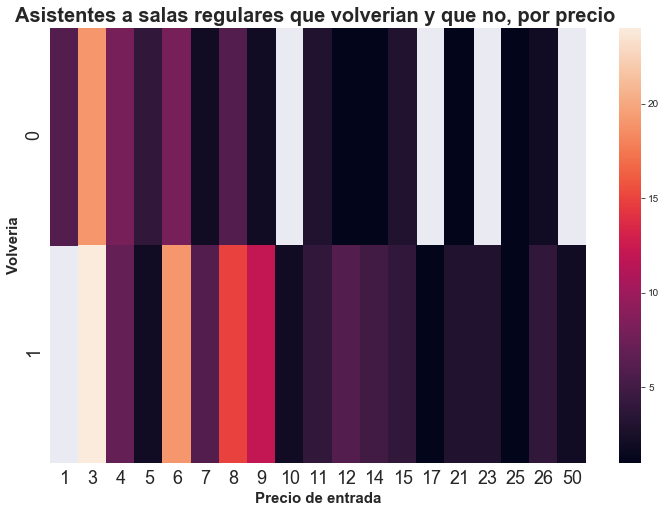

In [649]:
parametros_normal = df_sala_regular_vs_precio_ticket.pivot("volveria", "precio_ticket", "total_sala_normal")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_normal)#,cmap="Blues")
plt.tick_params(labelsize=18)

sns.despine(left = True, bottom = True)
plt.xlabel ('Precio de entrada', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Volveria', fontweight = 'semibold', fontsize = 15)
plt.title ('Asistentes a salas regulares que volverian y que no, por precio ', fontweight = 'semibold', fontsize = 20)
plt.show()

En esta grafica, podemos ver la intencion de volver a una de las salas de FiuMark a ver Frozen 4 de los asistentes encuestados en salas regulares. Por la naturaleza del grafico, vemos que resulta de especial interes ver aquellos precios que registran los contrastes de color mas marcados. Una aclaracion no menor es que en caso de no contar con datos para alguna categoria, la seccion correspondiente es de color *hueso*. Habiendo dicho esto, podemos ver, por ejemplo, que para la categoria 1 la intencion de no volver es total, algo similar a lo que pasa para las categorias 10, 17, 23 y 50 con intencion opuesta. De modo que, a partir de estas encuestas, se puede decir que aquellos que asistieron a una sala regular y que abonaron el precio mas bajo no son candidatos a volver. Exactamente lo opuesto ocurre con los otros grupos mencionados: la intencion de volver de los mismos es total, es decir que del total de encuestados en salas regulares que abonaron el precio correspondiente a la categoria 10, 17, 23 y 50 volverian. 

Solo por mencionar algunos otros grupos de interes, podemos citar a los grupos 6, 8 y 9, en donde la intencion de volver es superior a la de no volver. En el resto de los grupos, la intencion de retorno esta equitativamente repartida, por lo que tal vez no supongan un parametro robusto al momento de predecir futuros clientes.

**Observacion importante**: vale la pena destacar que las cantidades de cada categoria son muy diversas y, como se ha mencionado, una mayor cantidad de encuestados refleja un modelo mas cercano a la "realidad".

**SALA 3D**

In [650]:
df_sala_3d_vs_precio_ticket = df_sala_normal_vs_precio_ticket[df_sala_normal_vs_precio_ticket['tipo_de_sala']=='3d']
df_sala_3d_vs_precio_ticket.head()

,tipo_de_sala,precio_ticket,volveria
13,3d,2,1
18,3d,2,0
19,3d,3,1
26,3d,5,1
35,3d,3,0


In [651]:
df_sala_3d_vs_precio_ticket['total_sala_3d'] = df_sala_3d_vs_precio_ticket.groupby(['precio_ticket','volveria'])['tipo_de_sala'].transform('count')
df_sala_3d_vs_precio_ticket = df_sala_3d_vs_precio_ticket.drop_duplicates()
del df_sala_3d_vs_precio_ticket['tipo_de_sala']
df_sala_3d_vs_precio_ticket = df_sala_3d_vs_precio_ticket.sort_values('precio_ticket')
df_sala_3d_vs_precio_ticket.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,precio_ticket,volveria,total_sala_3d
91,1,0,6
13,2,1,42
18,2,0,50
19,3,1,28
35,3,0,21


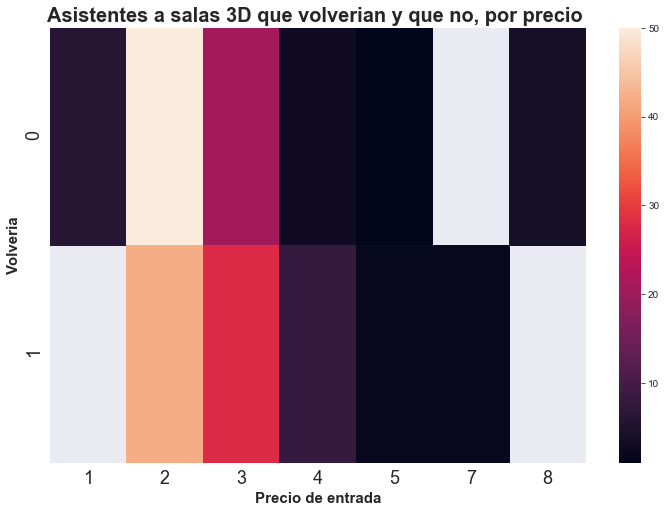

In [652]:
parametros_3D = df_sala_3d_vs_precio_ticket.pivot("volveria", "precio_ticket", "total_sala_3d")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_3D)#,cmap="Blues")
plt.tick_params(labelsize=18)

sns.despine(left = True, bottom = True)
plt.xlabel ('Precio de entrada', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Volveria', fontweight = 'semibold', fontsize = 15)
plt.title ('Asistentes a salas 3D que volverian y que no, por precio ', fontweight = 'semibold', fontsize = 20)
plt.show()

Para el caso de salas 3D, nos encontramos con varios escenarios. El escenario correspondiente a los precios de categorias 1, 7 y 8 registra registran una cantidad muy baja de datos para uno de los valores del *target* **volveria** y nulos para el otro. En el caso de la categoria 1 y 8, el 100% de los encuestados en las salas 3D afirmaron que no volverian a uno de los cines de FiuMark. No obstante, resaltamos el hecho de que los encuestados de este tipo fueron muy pocos. Para la categoria 7, el 100% indico que no volveria.

Para las categorias 4 y 5, los datos recabados son bajos y, ademas, no aportan *insights* relevantes pues aproximadamente la mitad indico que volveria mientras que la otra mitad no.

En lo que respecta a la categoria 2 y 3, la intecion de retorno esta similarmente repartida aunque los datos en estos casos son significativos (aproximadamente 30 encuestados).

A partir de este analisis podemos concluir que los *insights* que se extraen no resultan robustos, sea esto porque la cantidad de datos recogidos es baja o porque la diferencia entre los grupos que volverian y que no volverian no es significativa. Por o tanto, no se tomara en cuenta lo que se pueda inferir de este estudio.

**SALA 4D**

In [653]:
df_sala_4d_vs_precio_ticket = df_sala_normal_vs_precio_ticket[df_sala_normal_vs_precio_ticket['tipo_de_sala']=='4d']
df_sala_4d_vs_precio_ticket.head()

,tipo_de_sala,precio_ticket,volveria
0,4d,1,0
1,4d,2,0
3,4d,1,0
4,4d,2,1
6,4d,3,0


In [654]:
df_sala_4d_vs_precio_ticket['total_sala_4d'] = df_sala_4d_vs_precio_ticket.groupby(['precio_ticket','volveria'])['tipo_de_sala'].transform('count')
df_sala_4d_vs_precio_ticket = df_sala_4d_vs_precio_ticket.drop_duplicates()
del df_sala_4d_vs_precio_ticket['tipo_de_sala']
df_sala_4d_vs_precio_ticket = df_sala_4d_vs_precio_ticket.sort_values('precio_ticket')
df_sala_4d_vs_precio_ticket.head()

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,precio_ticket,volveria,total_sala_4d
0,1,0,242
17,1,1,59
1,2,0,42
4,2,1,31
6,3,0,28


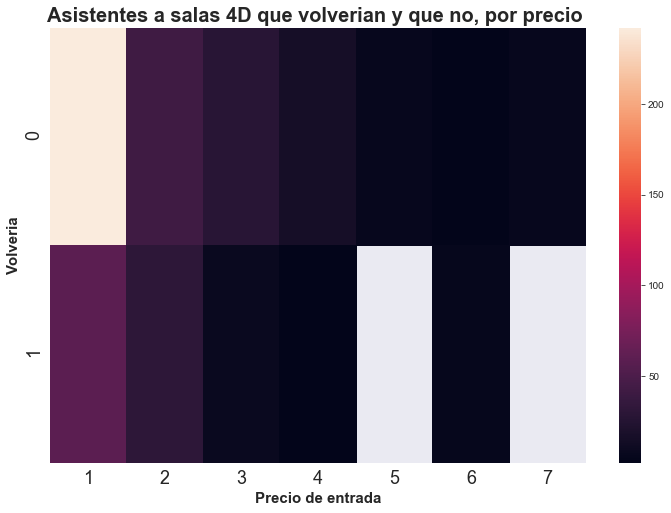

In [655]:
parametros_4D = df_sala_4d_vs_precio_ticket.pivot("volveria", "precio_ticket", "total_sala_4d")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_4D)#,cmap="Blues")
plt.tick_params(labelsize=18)

sns.despine(left = True, bottom = True)
plt.xlabel ('Precio de entrada', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Volveria', fontweight = 'semibold', fontsize = 15)
plt.title ('Asistentes a salas 4D que volverian y que no, por precio ', fontweight = 'semibold', fontsize = 20)
plt.show()

Para el caso de las salas 4D, se puede extraer un *insight* relevante: la cantidad de personas que adquirieron una entrada de categoria 1 y que volverian a una sala de FiuMark es bajisima en comparacion con las que no volverian. De este modo, se puede considerar esta condicion como discriminante para determinar si un cliente que haya adquirido una entrada de categoria 1 de sala 4D volveria o no. 

Por otro lado, la informacion que aportan las demas categorias es pobre, similar a lo analizado en el caso de las salas normales y 3D; no aportan informacion clave. 

<font color='green'>**SEGMENTO: NOMBRE_SEDE *VS* GENERO**</font>

In [656]:
df_nombre_sede_vs_genero = df_features_target[['nombre_sede','genero','volveria']]
df_nombre_sede_vs_genero = df_nombre_sede_vs_genero.dropna()
df_nombre_sede_vs_genero.head()

,nombre_sede,genero,volveria
0,fiumark_quilmes,hombre,0
1,fiumark_quilmes,mujer,0
2,fiumark_chacarita,hombre,0
3,fiumark_palermo,hombre,0
4,fiumark_palermo,mujer,1


**HOMBRES**

In [657]:
df_nombre_sede_vs_genero_hombre = df_nombre_sede_vs_genero[df_nombre_sede_vs_genero['genero']=='hombre']
df_nombre_sede_vs_genero_hombre.head()

,nombre_sede,genero,volveria
0,fiumark_quilmes,hombre,0
2,fiumark_chacarita,hombre,0
3,fiumark_palermo,hombre,0
5,fiumark_palermo,hombre,0
6,fiumark_palermo,hombre,0


In [658]:
df_nombre_sede_vs_genero_hombre['total_hombres'] = df_nombre_sede_vs_genero_hombre.groupby(['nombre_sede','volveria'])['genero'].transform('count')
df_nombre_sede_vs_genero_hombre = df_nombre_sede_vs_genero_hombre.drop_duplicates()
del df_nombre_sede_vs_genero_hombre['genero']
df_nombre_sede_vs_genero_hombre = df_nombre_sede_vs_genero_hombre.sort_values('nombre_sede')
df_nombre_sede_vs_genero_hombre.head(10)

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nombre_sede,volveria,total_hombres
2,fiumark_chacarita,0,59
27,fiumark_chacarita,1,24
3,fiumark_palermo,0,325
8,fiumark_palermo,1,67
0,fiumark_quilmes,0,35
47,fiumark_quilmes,1,3


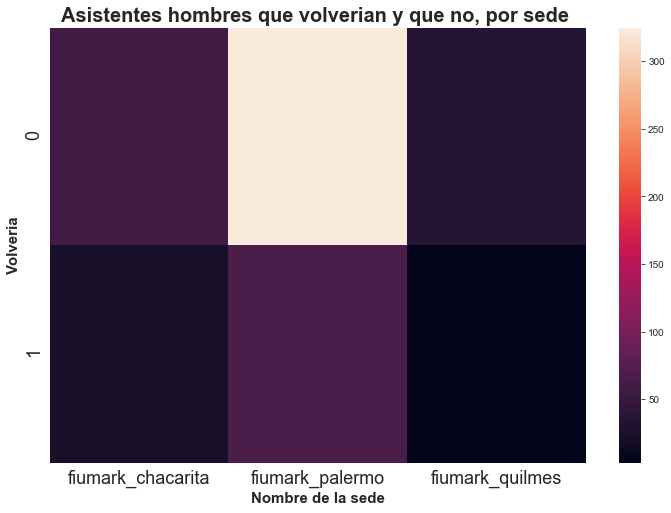

In [659]:
parametros_hombres = df_nombre_sede_vs_genero_hombre.pivot("volveria", "nombre_sede", "total_hombres")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_hombres)#,cmap="Blues")
plt.tick_params(labelsize=18)

sns.despine(left = True, bottom = True)
plt.xlabel ('Nombre de la sede', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Volveria', fontweight = 'semibold', fontsize = 15)
plt.title ('Asistentes hombres que volverian y que no, por sede ', fontweight = 'semibold', fontsize = 20)
plt.show()

Para este estudio, a saber, asistentes hombres por sede y segun intencion de retornar a uno de los cines FiuMark, podemos ver que en la sucursal de Palermo los datos recabados son concluyentes. La cantidad de hombres que volverian es notablemente inferior a los que tienen la intencion de volver. De este modo, si se toma como base estos datos, se puede predecir que aquellos hombres que asistieron a la sede de Palermo NO volverian a un cine FiuMark.

En el caso de las otras dos sedes nos encontramos con las siguientes dificultades: no solo la cantidad de datos es baja, sino que ademas la diferencia entre aquellos hombres con intencion de volver y aquellos que no, no es significativa.

**MUJERES**

In [660]:
df_nombre_sede_vs_genero_mujer = df_nombre_sede_vs_genero[df_nombre_sede_vs_genero['genero']=='mujer']
df_nombre_sede_vs_genero_mujer.head()

,nombre_sede,genero,volveria
1,fiumark_quilmes,mujer,0
4,fiumark_palermo,mujer,1
9,fiumark_chacarita,mujer,1
13,fiumark_palermo,mujer,1
15,fiumark_palermo,mujer,0


In [661]:
df_nombre_sede_vs_genero_mujer['total_mujeres'] = df_nombre_sede_vs_genero_mujer.groupby(['nombre_sede','volveria'])['genero'].transform('count')
df_nombre_sede_vs_genero_mujer = df_nombre_sede_vs_genero_mujer.drop_duplicates()
del df_nombre_sede_vs_genero_mujer['genero']
df_nombre_sede_vs_genero_mujer = df_nombre_sede_vs_genero_mujer.sort_values('nombre_sede')
df_nombre_sede_vs_genero_mujer.head(10)

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nombre_sede,volveria,total_mujeres
9,fiumark_chacarita,1,59
89,fiumark_chacarita,0,7
4,fiumark_palermo,1,128
15,fiumark_palermo,0,59
1,fiumark_quilmes,0,9
132,fiumark_quilmes,1,24


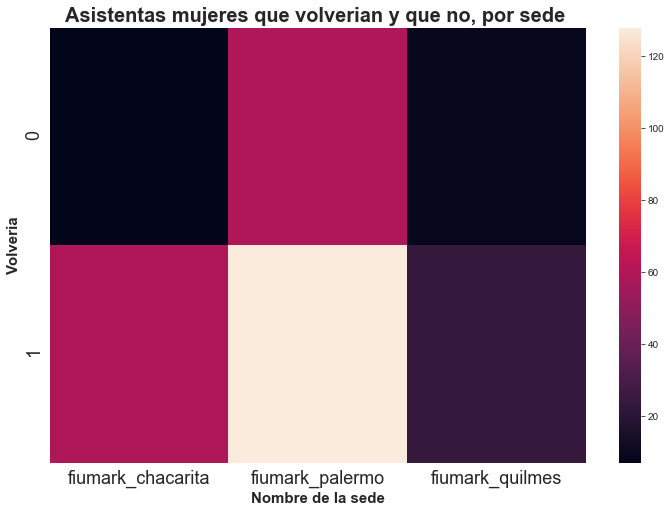

In [662]:
parametros_mujeres = df_nombre_sede_vs_genero_mujer.pivot("volveria", "nombre_sede", "total_mujeres")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_mujeres)#,cmap="Blues")
plt.tick_params(labelsize=18)

sns.despine(left = True, bottom = True)
plt.xlabel ('Nombre de la sede', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Volveria', fontweight = 'semibold', fontsize = 15)
plt.title ('Asistentas mujeres que volverian y que no, por sede ', fontweight = 'semibold', fontsize = 20)
plt.show()

Los *insights* que aportan este grafico son relevantes al estudio de mercado que lleva adelante FiuMark. En el caso de la sede de Chacarita, la intencion de retorno del publico femenino es altisima en comparacion con el que no, es decir, se puede concluir a partir de estos datos que la mayoria de dicho publico volvera a ver Frozen 4. De igual modo, pero con menor intensidad, puede afirmarse lo mismo para las encuestadas en la sucursal de Palermo. Vale destacar que, en este caso, la diferencia entre los grupos no es tan marcada como si ocurre en el caso de Chacarita. En lo que respecta a FiuMark Quilmes, la diferencia entre las que asistirian y las que no tampoco es fuerte y las encuestas llevadas a cabo no son tan numerosas como en los otros casos.

<font color='green'>**SEGMENTO: GRUPO_DE_EDAD *VS* CANTIDAD_DE_ACOMPANANTES**</font>

In [663]:
df_edad_vs_cant_acompanantes = df_features_target[['edad','amigos','parientes','volveria']]
df_edad_vs_cant_acompanantes = df_edad_vs_cant_acompanantes.dropna()
df_edad_vs_cant_acompanantes ['cantidad_acompanantes'] = df_edad_vs_cant_acompanantes['amigos'] + df_edad_vs_cant_acompanantes['parientes']
del df_edad_vs_cant_acompanantes['amigos']
del df_edad_vs_cant_acompanantes['parientes']
df_edad_vs_cant_acompanantes.head()

,edad,volveria,cantidad_acompanantes
0,73.5,0,0
1,35.0,0,2
4,4.0,1,2
7,32.0,0,0
8,41.0,1,1


In [664]:
#Armamos los grupos de edades para clasificar
df_edad_vs_cant_acompanantes = df_edad_vs_cant_acompanantes.dropna()
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']<=5, 'rango'] = '0-05'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>5 , 'rango'] = '05-10'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=10 , 'rango'] = '10-15'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=15 , 'rango'] = '15-20'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=20 , 'rango'] = '20-25'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=25 , 'rango'] = '25-30'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=30 , 'rango'] = '30-35'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=35 , 'rango'] = '35-40'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=40 , 'rango'] = '40-45'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=45 , 'rango'] = '45-50'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=50 , 'rango'] = '50-55'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=55 , 'rango'] = '55-60'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=60 , 'rango'] = '60-65'
df_edad_vs_cant_acompanantes.loc[df_edad_vs_cant_acompanantes['edad']>=65 , 'rango'] = '65-99'
del df_edad_vs_cant_acompanantes['edad']
df_edad_vs_cant_acompanantes['volveria']
df_edad_vs_cant_acompanantes.head()

,volveria,cantidad_acompanantes,rango
0,0,0,65-99
1,0,2,35-40
4,1,2,0-05
7,0,0,30-35
8,1,1,40-45


**CASO: CANTIDAD DE ACOMPANATES POR EDAD PARA LOS QUE VOLVERIAN**

In [665]:
df_edad_vs_cant_acompanantes_volverian = df_edad_vs_cant_acompanantes[df_edad_vs_cant_acompanantes['volveria']==1]
df_edad_vs_cant_acompanantes_volverian['cantidad_volverian'] = df_edad_vs_cant_acompanantes_volverian.groupby(['rango','cantidad_acompanantes'])['volveria'].transform('count')
df_edad_vs_cant_acompanantes_volverian = df_edad_vs_cant_acompanantes_volverian.sort_values('rango')
df_edad_vs_cant_acompanantes_volverian = df_edad_vs_cant_acompanantes_volverian.drop_duplicates()
del df_edad_vs_cant_acompanantes_volverian['volveria']
df_edad_vs_cant_acompanantes_volverian.head()                                                                                                                               

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cantidad_acompanantes,rango,cantidad_volverian
4,2,0-05,7
65,3,0-05,4
715,1,0-05,2
481,2,05-10,6
703,3,05-10,4


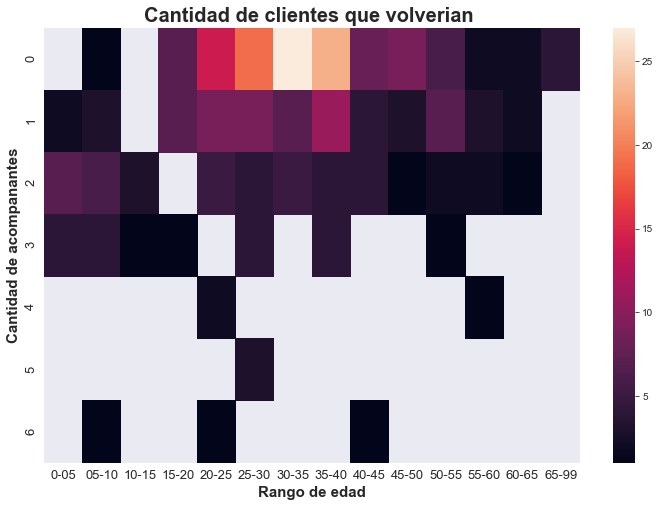

In [666]:
parametros_volverian_acompanantes_edad = df_edad_vs_cant_acompanantes_volverian.pivot("cantidad_acompanantes", "rango", "cantidad_volverian")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_volverian_acompanantes_edad)#,cmap="Blues")
plt.tick_params(labelsize=13)

sns.despine(left = True, bottom = True)
plt.xlabel ('Rango de edad', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Cantidad de acompanantes', fontweight = 'semibold', fontsize = 15)
plt.title ('Cantidad de clientes que volverian ', fontweight = 'semibold', fontsize = 20)
plt.show()

El grafico muestra claramente que los clientes que han asistido SOLOS en los rangos de edad *20-25*, *25-30*, *30-35* o *35-40* son los que mas chances tienen de volver con respecto a los demas grupos. En el caso de los grupos grandes, al igual que se ha visto en graficos anteriores, las chances de volver son bajas o nulas (este ultimo valor representado por rectangulos color *hueso*). En lo referente a los demas valores, se ve que la intencion de retorno se distribuye de forma uniforme (haciendo las salvedades ya mencionadas) y no hay diferencias significativas entre grupos de edad ni en la cantidad de acompanantes que asistieron a alguno de los cines de FiuMark. Si de esa seccion del *heatmap* se pudiese derivar alguna conclusion seria que los clientes con intencion de volver son aquellos que asistieron en grupos de 3 o menos personas para la mayoria de los grupos de edades. Sin embargo, ratificamos que los clientes mencionados en primera instancia son los que, de este conjunto de posibilidades a dos variables, tienen probabilidad fuerte de volver para ver Frozen 4.

**CASO: CANTIDAD DE ACOMPANATES POR EDAD PARA LOS QUE NO VOLVERIAN**

In [667]:
df_edad_vs_cant_acompanantes_no_volverian = df_edad_vs_cant_acompanantes[df_edad_vs_cant_acompanantes['volveria']==0]
df_edad_vs_cant_acompanantes_no_volverian['volveria'] = df_edad_vs_cant_acompanantes_no_volverian['volveria'].map({0:1})
df_edad_vs_cant_acompanantes_no_volverian['cantidad_no_volverian'] = df_edad_vs_cant_acompanantes_no_volverian.groupby(['rango','cantidad_acompanantes'])['volveria'].transform('count')
df_edad_vs_cant_acompanantes_no_volverian = df_edad_vs_cant_acompanantes_no_volverian.sort_values('rango')
df_edad_vs_cant_acompanantes_no_volverian = df_edad_vs_cant_acompanantes_no_volverian.drop_duplicates()
del df_edad_vs_cant_acompanantes_no_volverian['volveria']
df_edad_vs_cant_acompanantes_no_volverian.head()     

C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ron Heyes\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cantidad_acompanantes,rango,cantidad_no_volverian
520,6,0-05,1
146,1,0-05,1
172,3,0-05,1
477,5,0-05,4
356,7,0-05,1


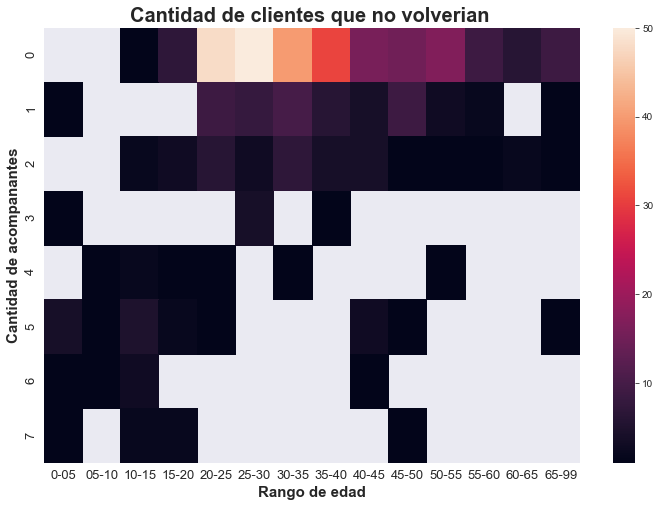

In [668]:
parametros_no_volverian_acompanantes_edad = df_edad_vs_cant_acompanantes_no_volverian.pivot("cantidad_acompanantes", "rango", "cantidad_no_volverian")
plt.figure(figsize = (12,8))
ax = sns.heatmap(parametros_no_volverian_acompanantes_edad)#,cmap="Blues")
plt.tick_params(labelsize=13)

sns.despine(left = True, bottom = True)
plt.xlabel ('Rango de edad', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Cantidad de acompanantes', fontweight = 'semibold', fontsize = 15)
plt.title ('Cantidad de clientes que no volverian ', fontweight = 'semibold', fontsize = 20)
plt.show()

Al igual que ocurre con la grafica anterior, el grupo de posibles candidatos a **no volver** se ubica en los rangos de edad 20-25, 25-30, 30-35 o 35-40, para aquellos que asistieron SOLOS. Esta revelacion nos acerca al siguiente predicamento: el conjunto de candidatos a VOLVER y a NO VOLVER esta sectorizado en la misma zona del *heatmap*. Los *insights* que aportan los demas rectangulos son pobres (muy baja cantidad de datos recopilados) para concluir fehacientemente que un cliente con ciertas caracteristicas determinadas (cantidad de acompañantes y rango de edad) volvera o no volvera. No obstante, volviendo al primer descubrimiento, vemos que si bien la porcion significativa de clientes candidatos a volver y a no volver se ubican en la misma region, las cantidades resultan sustancialmente diferentes. Mientras que en la grafica anterior aquellos valores rondaban entre los 20 y los 25 miembros, en este grafico esa cantidad es mayor (aproximadamente el doble que su antecesor). Por lo que, con un orden de significacion del 30% (aproximadamente), podemos decir que aquellas personas entre 20 y 40 años que han asistido SOLAS  tienen mayor probabilidad de NO asistir que de asistir a la pelicula Frozen 4.
Continuando con la comparacion entre las graficas, concluimos que los candidatos a volver son los siguientes grupos:
- el rango de 0 a 10 años, con 2 acompañantes
- el rango de 15 a 20 años, con 1 acompañante

## Nuevos features a partir del dataset

<font color='blue'>**DESGLOSE DE DATOS DE NOMBRE EN DENOMINACION Y NOMBRE**</font>

In [669]:
df_denom_nombre = pd.DataFrame(df_features_target.nombre.str.split(' ',1).tolist(), columns = ['denominacion','nombre'])
df_features_target['nombre'] = df_denom_nombre['nombre']
df_features_target.insert(1,'denominacion',df_denom_nombre['denominacion'])
df_features_target

,tipo_de_sala,denominacion,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor,Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora,Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor,Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor,Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita,Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor,Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita,Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor,Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita,Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


Comprobamos valores nulos para el nuevo *feature* DENOMINACION y el *feature* actualizado NOMBRE

In [670]:
df_NaN_Values = df_denom_nombre.isnull().mean() * 100
df_NaN_Values

denominacion    0.0
nombre          0.0
dtype: float64

No hay valores nulos.
Genereamos un nuevo DF para obtener la cantidad de los que volverian y los que no, por DENOMINACION

In [671]:
df_denom_vs_target = pd.crosstab(df_features_target['denominacion'],df_features_target['volveria']).reset_index()
df_denom_vs_target['total'] = df_denom_vs_target [0] + df_denom_vs_target [1]
df_denom_vs_target

volveria,denominacion,0,1,total
0,Señor,419,96,515
1,Señora,22,97,119
2,Señorita,53,114,167


In [672]:
# Convertimos valores a porcentajes
df_denom_vs_target ['no volverian'] = (df_denom_vs_target [0])*100/(df_denom_vs_target['total'])
df_denom_vs_target ['volverian'] = (df_denom_vs_target [1])*100/(df_denom_vs_target['total'])
del df_denom_vs_target[0]
del df_denom_vs_target[1]
del df_denom_vs_target['total']
df_denom_vs_target

volveria,denominacion,no volverian,volverian
0,Señor,81.359223,18.640777
1,Señora,18.487395,81.512605
2,Señorita,31.736527,68.263473


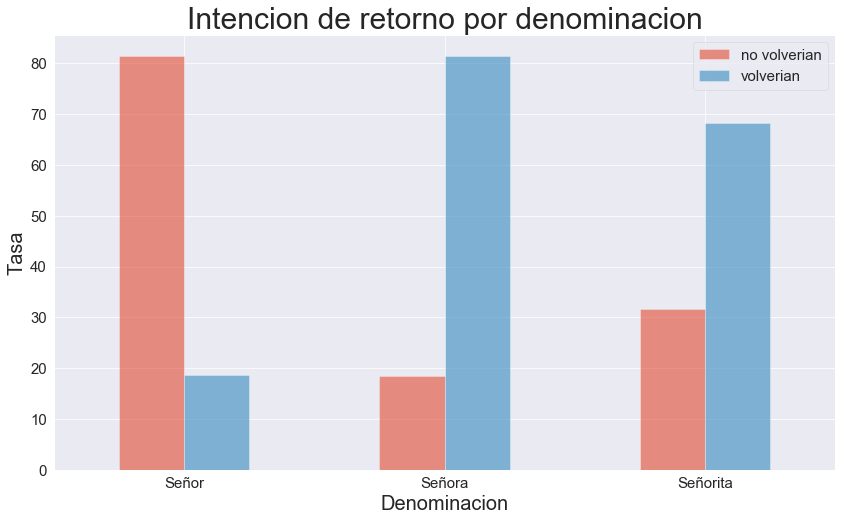

In [673]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.set_color_codes("pastel")
ax = df_denom_vs_target.plot.bar(figsize = (14,8), fontsize = 15, x='denominacion',alpha=0.6, rot=0)
ax.set_xlabel('Denominacion', fontsize = 20)
ax.set_ylabel('Tasa', fontsize = 20)
ax.set_title('Intencion de retorno por denominacion', fontsize = 30)
ax.legend(fontsize = 15)

La grafica no arroja nueva luz sobre las conclusiones ya obtenidas. Si embargo, refuerza la idea de que la intencion de retorno se distribuye fuertemente entre el publico femenino, con mayor fuerza en el sector del grupo denominado SEÑORA. De modo que, al igual que se dijo con anterioridad, el hecho de que una de las personas encuestadas sea mujer, dice mucho de la posibilidad de que vuelva a FiuMark a ver Frozen 4.

# SECTION 2: *Insights obtenidos - seleccion*

En la seccion anterior, hemos llevado adelante un analisis exploratorio de datos que permitio detenernos en aspectos particulares de los registros recabados. A partir de los mismos, se han detectados ciertos patrones o caracteristicas que pueden ayudar a predecir con *cierta* exactitud si nuevos clientes que cumplen con una determinada taxonomia son candidatos a concurrir a alguno de los cines de FiuMark para ver Frozen 4.

En cada analisis grafico de la seccion previa, se realizaron observaciones y comentarios detallados que han permitido "descubrir" patrones que, esperamos, ayuden a discriminar entre posibles candidatos a asistir (o no) a una de las sedes de FiuMark. Estos son los resultados obtenidos a partir de dichas visualizaciones:
- El campo **fila**, por su alta densidad de valores nulos, es completamente ignorado en el analisis predictivo realizado
- Del *feature* **genero**, deducimos que las mujeres tienen una mayor probabilidad de volver a un cine FiuMark a ver Frozen 4
- Del *feature* construido **denominacion**, se distingue que **señoras** tienen una marcada tendencia a volver, y  **señoritas** tambien, aunque con menor intensidad. De **señores** no se deduce información nueva ya que **señores** es equivalente a **hombre** en el *feature* **genero**
- De la columna **amigos**, se puede decir que los asistentes que fueron sin ningun tipo de compañia o aquellos que fueron en grupos numerosos (mas de 3) son menos propensos a volver
- Los *insights* para la columna **parientes** son similares a los de la columna **amigos**
- Del campo **nombre_sede** se puede inferir que los de la sede de Chacarita son los mas propensos a volver
- Del *feature* **precio_ticket** vemos que las categorias de precio 6, 9, 12, 14 y 23 son las que volverian
- De la columna **edad**, se concluye que el grupo de *0 a 10 años* es el de mayor probabilidad a volver
- De la columna **tipo_de_sala** se puede decir que los clientes que hayan asistido a una sala normal (no 3D ni 4D) tienen mayor intencion de retorno
- Los clientes que adquirieron una entrada de categoria 1 no volverian a alguno de los cines de FiuMark.
- Los clientes que adquirieron una entrada de categoria 2, 3, 4 o 5 volverian a alguno de los cines de FiuMark (discriminante debil)

Posteriormente, se vincularon distintos *features* para generar nuevos *insights* que permitiesen detectar candidatos a volver. Los graficos desarrollados arrojaron lo siguiente:
- Los clientes que adquirieron una entrada *normal* de categoria 6,8, 9, 10, 17, 23 y 50 volverian a alguno de los cines de FiuMark  
- Los clientes que adquirieron una entrada *4D* de categoria 1 no volverian a alguno de los cines de FiuMark  
- El publico femenino con serias intenciones de volver se ubica, en primer lugar en la sala de Chacarita y luego en la sla de Palermo.
- Son candidatos a volver los encuestados en el rango de 0 a 10 años, con 2 acompañantes
- Son candidatos a volver los encuestados en el rango de 15 a 20 años, con 1 acompañante
- Son candidatos a NO volver los encuestados en el rango de 20 a 40 años que han asistido solas

In [674]:
df_features_target

,tipo_de_sala,denominacion,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor,Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora,Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor,Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor,Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita,Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor,Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita,Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor,Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita,Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


In [675]:
train_df_features

,Unnamed: 0,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,116,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,657,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,793,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,454,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,172,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo
...,...,...,...,...,...,...,...,...,...,...,...,...
796,447,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo
797,635,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo
798,847,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita
799,303,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes


# SECTION 3: *BASELINE Y SUS FUNDAMENTOS*

## Analisis de las predicciones y evaluacion de los parametros seleccionados

En esta seccion previa a la definicion del *baseline*, se analizara la significacion que cada parametro aporta a la correcta discriminacion entre los candidatos a volver a alguno de los cines de FiuMark para ver Frozen 4 y los que no. El analisis del dataset ha demostrado que el comportamiento de los generos *hombre* y *mujer* es diverso. Por tal motivo, y con el espiritu de querer lograr un alto *accuracy*, se ha bifurcado la seleccion de candidatos en *hombre* y *mujer*.

Al momento de medir el *accuracy* hay que tener en cuenta los siguientes criterios:
- la cantidad de aciertos: cuantas de las predicciones definidas por parametros (sede, edad, amigos, etc) resultaron verdaderas
- la cantidad de desaciertos: cuantas de las predicciones definidas por parametros (sede, edad, amigos, etc) resultaron falsas (*falsos positivos*)
- la cantidad de registros desechadas que no deberian haber sido desechadas, es decir, *falsos negativos*

Para poder entender la exactitud que describe la funcion *baseline*, se ha ido analizando, *feature* por *feature* (con su valor asociado) la evolucion del modelo, con graficos incluidos. Los filtros o discriminantes tienen una ocurrencia temporal, de modo que, por ejemplo, para la fila **sede** y la fila **amigos**, **sede** filtra antes que **amigos** y los valores de las columnas de la fila **amigos** acumulan los valores que previamente ha filtrado **sede**.


A continuacion, se muestra el impacto que cada parametro aporta al analisis.

### <font color='purple'>**RAMA: MUJER**</font>

In [676]:
#Generamos un dataframe de solo mujeres para analizar la evolucion de los candidatos conociendo el target
columna_encabezados = ['volverian', 'no_volverian','aciertos(%)','falsos_positivos(%)','falsos_negativos(%)']
discriminante = ['mujer','sede','amigos','parientes','ticket','sala']
df_mujer = pd.DataFrame(index = discriminante, columns=columna_encabezados)
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,NaN,NaN,NaN,NaN,NaN
sede,NaN,NaN,NaN,NaN,NaN
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN


In [677]:
#Rama: candidatos mujer
candidatos_mujer = train_df_features.loc[train_df_features['genero'] == 'mujer']
cantidad_volveria_mujer = len(candidatos_mujer.index)
print('Hay un total de ' + str(cantidad_volveria_mujer) + ' registros del genero MUJER en los datos' )

Hay un total de 288 registros del genero MUJER en los datos


**ANALISIS DE ACCURACY - mujer**

Usamos la informacion en el dataframe que contiene el *target* para analizar cuantos de los registros *mujer* volverian y cuantos no

In [678]:
#Analizamos 
target_candidatos_mujer = pd.merge(candidatos_mujer,train_df_values, on = 'id_usuario')
target_candidatos_mujer = target_candidatos_mujer.loc[target_candidatos_mujer['volveria']==1]
target_candidatos_mujer = len(target_candidatos_mujer)
df_mujer.loc['mujer','volverian'] = target_candidatos_mujer
df_mujer.loc['mujer','no_volverian'] = cantidad_volveria_mujer - target_candidatos_mujer

# no desechamos ningun registro del subset "mujer", solo inicializamos los valores aciertos, falsos_positivos y falsos_negativos
df_mujer.loc['mujer','aciertos(%)'] = 100
df_mujer.loc['mujer','falsos_positivos(%)'] = 0
df_mujer.loc['mujer','falsos_negativos(%)'] = 0
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,NaN,NaN,NaN,NaN,NaN
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN


<font color='purple'>**RAMA: MUJER-->SEDE**</font>

In [679]:
#Subrama mujer: nombre de la sede
candidatos_mujer_sede = candidatos_mujer.loc[candidatos_mujer['nombre_sede']!='fiumark_quilmes']
cantidad_volveria_mujer_sede = len(candidatos_mujer_sede.index)
print('Excluyendo a la sede de FiuMark Quilmes, obtenemos ' + str(cantidad_volveria_mujer_sede) + ' registros candidatos')

Excluyendo a la sede de FiuMark Quilmes, obtenemos 255 registros candidatos


**ANALISIS DE ACCURACY - mujer por SEDE**

In [680]:
#Analizamos 
target_candidatos_mujer_sede = pd.merge(candidatos_mujer_sede,train_df_values, on = 'id_usuario')
target_candidatos_mujer_sede = target_candidatos_mujer_sede.loc[target_candidatos_mujer_sede['volveria']==1]
target_candidatos_mujer_sede = len(target_candidatos_mujer_sede)
df_mujer.loc['sede','volverian'] = target_candidatos_mujer_sede
df_mujer.loc['sede','no_volverian'] = cantidad_volveria_mujer_sede - target_candidatos_mujer_sede

df_mujer.loc['sede','aciertos(%)'] = target_candidatos_mujer_sede/cantidad_volveria_mujer_sede
df_mujer.loc['sede','falsos_positivos(%)'] = (cantidad_volveria_mujer_sede - target_candidatos_mujer_sede)/cantidad_volveria_mujer_sede
df_mujer.loc['sede','falsos_negativos(%)'] = (df_mujer.loc['mujer','volverian']-df_mujer.loc['sede','volverian'])/df_mujer.loc['mujer','volverian']
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,189,66,0.741176,0.258824,0.112676
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN


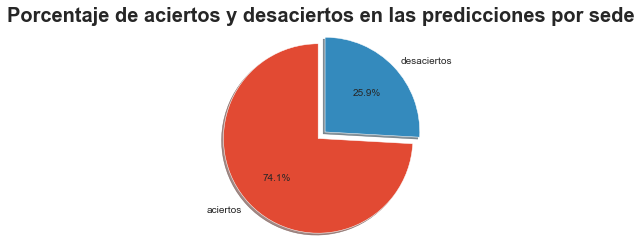

In [681]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_mujer.iloc[1,0], df_mujer.iloc[1,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por sede', fontweight = 'semibold', fontsize = 20)
plt.show()


Si filtramos por sede y consideramos a todos los registros (solo **mujer**) como candidatos, tenemos un acierto del 74.1% y 25.9% de desacierto. Buscaremos con los nuevos filtrados mejorar esos porcentajes.

<font color='purple'>**RAMA: MUJER-->SEDE-->AMIGOS**</font>

In [682]:
#Subrama mujer, subrama Chacarita/Palermo: amigos
candidatos_mujer_sede_amigos = candidatos_mujer_sede.loc[candidatos_mujer_sede['amigos']<4]
cantidad_volveria_mujer_sede_amigos = len(candidatos_mujer_sede_amigos.index)
print('Excluyendo a los grupos mayores a 3 amigos, obtenemos ' + str(cantidad_volveria_mujer_sede_amigos) + ' registros candidatos')

Excluyendo a los grupos mayores a 3 amigos, obtenemos 246 registros candidatos


**ANALISIS DE ACCURACY - mujer por sede por AMIGOS**

In [683]:
#Analizamos 
target_candidatos_mujer_sede_amigos = pd.merge(candidatos_mujer_sede_amigos,train_df_values, on = 'id_usuario')
target_candidatos_mujer_sede_amigos = target_candidatos_mujer_sede_amigos.loc[target_candidatos_mujer_sede_amigos['volveria']==1]
target_candidatos_mujer_sede_amigos = len(target_candidatos_mujer_sede_amigos)
df_mujer.loc['amigos','volverian'] = target_candidatos_mujer_sede_amigos
df_mujer.loc['amigos','no_volverian'] = cantidad_volveria_mujer_sede_amigos - target_candidatos_mujer_sede_amigos


df_mujer.loc['amigos','aciertos(%)'] = target_candidatos_mujer_sede_amigos/cantidad_volveria_mujer_sede_amigos
df_mujer.loc['amigos','falsos_positivos(%)'] = (cantidad_volveria_mujer_sede_amigos - target_candidatos_mujer_sede_amigos)/cantidad_volveria_mujer_sede_amigos
df_mujer.loc['amigos','falsos_negativos(%)'] = (df_mujer.loc['mujer','volverian']-df_mujer.loc['amigos','volverian'])/df_mujer.loc['mujer','volverian']
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,189,66,0.741176,0.258824,0.112676
amigos,188,58,0.764228,0.235772,0.117371
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN


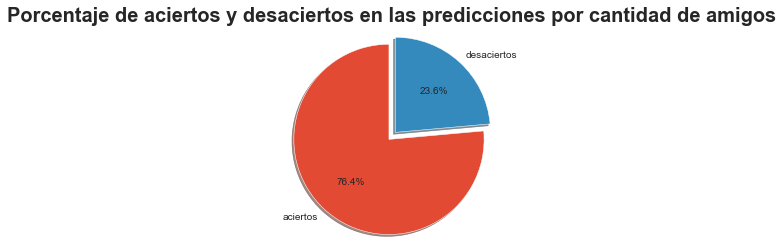

In [684]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_mujer.iloc[2,0], df_mujer.iloc[2,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por cantidad de amigos', fontweight = 'semibold', fontsize = 20)
plt.show()

Observacion: se puede ver como con un levisimo aumento de falsos negativos se mejoro el porcentaje de aciertos (aumento) y el de falsos positivos (se redujo)

<font color='purple'>**RAMA: MUJER-->SEDE-->AMIGOS-->PARIENTES**</font>

In [685]:
#Subrama mujer, subrama Chacarita/Palermo, subrama amigos: parientes
candidatos_mujer_sede_amigos_parientes = candidatos_mujer_sede_amigos.loc[candidatos_mujer_sede_amigos['parientes']<4]
cantidad_volveria_mujer_sede_amigos_parientes = len(candidatos_mujer_sede_amigos_parientes.index)
print('Excluyendo a los grupos mayores a 3 parientes, obtenemos ' + str(cantidad_volveria_mujer_sede_amigos_parientes) + ' registros candidatos')

Excluyendo a los grupos mayores a 3 parientes, obtenemos 240 registros candidatos


**ANALISIS DE ACCURACY - mujer por sede por amigos por PARIENTES**

In [686]:
#Analizamos 
target_candidatos_mujer_sede_amigos_parientes = pd.merge(candidatos_mujer_sede_amigos_parientes,train_df_values, on = 'id_usuario')
target_candidatos_mujer_sede_amigos_parientes = target_candidatos_mujer_sede_amigos_parientes.loc[target_candidatos_mujer_sede_amigos_parientes['volveria']==1]
target_candidatos_mujer_sede_amigos_parientes = len(target_candidatos_mujer_sede_amigos_parientes)
df_mujer.loc['parientes','volverian'] = target_candidatos_mujer_sede_amigos_parientes
df_mujer.loc['parientes','no_volverian'] = cantidad_volveria_mujer_sede_amigos_parientes - target_candidatos_mujer_sede_amigos_parientes

df_mujer.loc['parientes','aciertos(%)'] = target_candidatos_mujer_sede_amigos_parientes/cantidad_volveria_mujer_sede_amigos_parientes
df_mujer.loc['parientes','falsos_positivos(%)'] = (cantidad_volveria_mujer_sede_amigos_parientes - target_candidatos_mujer_sede_amigos_parientes)/cantidad_volveria_mujer_sede_amigos_parientes
df_mujer.loc['parientes','falsos_negativos(%)'] = (df_mujer.loc['mujer','volverian']-df_mujer.loc['parientes','volverian'])/df_mujer.loc['mujer','volverian']
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,189,66,0.741176,0.258824,0.112676
amigos,188,58,0.764228,0.235772,0.117371
parientes,187,53,0.779167,0.220833,0.122066
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN


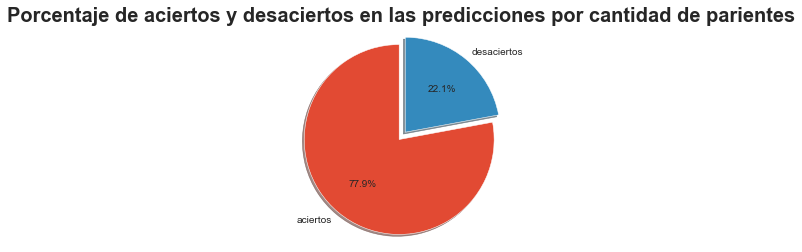

In [687]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_mujer.iloc[3,0], df_mujer.iloc[3,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por cantidad de parientes', fontweight = 'semibold', fontsize = 20)
plt.show()

Observacion: hay una mejora en el *accuracy* a bajo costo (aumento de falsos negativos)

<font color='purple'>**RAMA: MUJER-->SEDE-->AMIGOS-->PARIENTES-->PRECIO**</font>

In [688]:
#Subrama mujer, subrama Chacarita/Palermo, subrama amigos, subrama parientes: precio ticket
candidatos_mujer_sede_amigos_parientes_ticket = candidatos_mujer_sede_amigos_parientes.loc[(candidatos_mujer_sede_amigos_parientes['precio_ticket']>1)]
cantidad_volveria_mujer_sede_amigos_parientes_ticket = len(candidatos_mujer_sede_amigos_parientes_ticket.index)
print('Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos ' + str(cantidad_volveria_mujer_sede_amigos_parientes_ticket) + ' registros')

Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos 206 registros


**ANALISIS DE ACCURACY - mujer por sede por amigos por parientes por TICKET**

In [689]:
#Analizamos 
target_candidatos_mujer_sede_amigos_parientes_ticket = pd.merge(candidatos_mujer_sede_amigos_parientes_ticket,train_df_values, on = 'id_usuario')
target_candidatos_mujer_sede_amigos_parientes_ticket = target_candidatos_mujer_sede_amigos_parientes_ticket.loc[target_candidatos_mujer_sede_amigos_parientes_ticket['volveria']==1]
target_candidatos_mujer_sede_amigos_parientes_ticket = len(target_candidatos_mujer_sede_amigos_parientes_ticket)
df_mujer.loc['ticket','volverian'] = target_candidatos_mujer_sede_amigos_parientes_ticket
df_mujer.loc['ticket','no_volverian'] = cantidad_volveria_mujer_sede_amigos_parientes_ticket - target_candidatos_mujer_sede_amigos_parientes_ticket


df_mujer.loc['ticket','aciertos(%)'] = target_candidatos_mujer_sede_amigos_parientes_ticket/cantidad_volveria_mujer_sede_amigos_parientes_ticket
df_mujer.loc['ticket','falsos_positivos(%)'] = (cantidad_volveria_mujer_sede_amigos_parientes_ticket - target_candidatos_mujer_sede_amigos_parientes_ticket)/cantidad_volveria_mujer_sede_amigos_parientes_ticket
df_mujer.loc['ticket','falsos_negativos(%)'] = (df_mujer.loc['mujer','volverian']-df_mujer.loc['ticket','volverian'])/df_mujer.loc['mujer','volverian']
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,189,66,0.741176,0.258824,0.112676
amigos,188,58,0.764228,0.235772,0.117371
parientes,187,53,0.779167,0.220833,0.122066
ticket,171,35,0.830097,0.169903,0.197183
sala,NaN,NaN,NaN,NaN,NaN


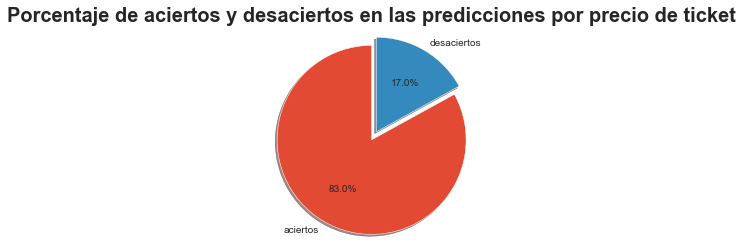

In [690]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_mujer.iloc[4,0], df_mujer.iloc[4,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por precio de ticket', fontweight = 'semibold', fontsize = 20)
plt.show()

Observacion: Como se puede ver, luego de filtrar por *ticket* se mejoro notablemente el porcentaje de aciertos y el de falsos positivos. No obstante, el costo de tal mejora fue mayor que en los casos anteriores pues se empeoro el valor **falsos_negativos**.

<font color='purple'>**RAMA: MUJER-->SEDE-->AMIGOS-->PARIENTES-->PRECIO-->SALA**</font>

In [691]:
#Subrama mujer, subrama Chacarita/Palermo, subrama amigos, subrama parientes subrama precio ticket: sala
candidatos_mujer_sede_amigos_parientes_ticket_sala = candidatos_mujer_sede_amigos_parientes_ticket.loc[(candidatos_mujer_sede_amigos_parientes['tipo_de_sala']!='4d')]
cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala = len(candidatos_mujer_sede_amigos_parientes_ticket_sala.index)
print('Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos ' + str(cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala) + ' registros')

Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos 154 registros


**ANALISIS DE ACCURACY - mujer por sede por amigos por parientes por ticket por SALA**

In [692]:
#Analizamos 
target_candidatos_mujer_sede_amigos_parientes_ticket_sala = pd.merge(candidatos_mujer_sede_amigos_parientes_ticket_sala,train_df_values, on = 'id_usuario')
target_candidatos_mujer_sede_amigos_parientes_ticket_sala = target_candidatos_mujer_sede_amigos_parientes_ticket_sala.loc[target_candidatos_mujer_sede_amigos_parientes_ticket_sala['volveria']==1]
target_candidatos_mujer_sede_amigos_parientes_ticket_sala = len(target_candidatos_mujer_sede_amigos_parientes_ticket_sala)
df_mujer.loc['sala','volverian'] = target_candidatos_mujer_sede_amigos_parientes_ticket_sala
df_mujer.loc['sala','no_volverian'] = cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala - target_candidatos_mujer_sede_amigos_parientes_ticket_sala


df_mujer.loc['sala','aciertos(%)'] = target_candidatos_mujer_sede_amigos_parientes_ticket_sala/cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala
df_mujer.loc['sala','falsos_positivos(%)'] = (cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala - target_candidatos_mujer_sede_amigos_parientes_ticket_sala)/cantidad_volveria_mujer_sede_amigos_parientes_ticket_sala
df_mujer.loc['sala','falsos_negativos(%)'] = (df_mujer.loc['mujer','volverian']-df_mujer.loc['sala','volverian'])/df_mujer.loc['mujer','volverian']
df_mujer

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
mujer,213,75,100,0,0
sede,189,66,0.741176,0.258824,0.112676
amigos,188,58,0.764228,0.235772,0.117371
parientes,187,53,0.779167,0.220833,0.122066
ticket,171,35,0.830097,0.169903,0.197183
sala,147,7,0.954545,0.0454545,0.309859


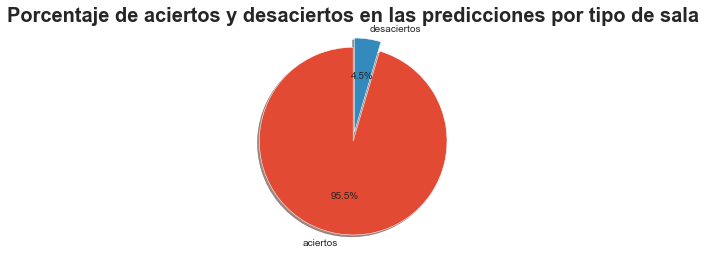

In [693]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_mujer.iloc[5,0], df_mujer.iloc[5,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por tipo de sala', fontweight = 'semibold', fontsize = 20)
plt.show()

Es interesante, ademas, analizar el costo de la mejora porcentual en las predicciones. Este costo se traduce en registros mal clasificados (y por lo tanto, desechados). La evolucion ACIERTOS vs COSTO se representa en la siguiente grafica:

In [694]:
df_mujer_short = df_mujer.reset_index()
df_mujer_short = df_mujer_short[['aciertos(%)','falsos_negativos(%)']]
df_mujer_short = df_mujer_short.iloc[1:,:]
df_mujer_short

,aciertos(%),falsos_negativos(%)
1,0.741176,0.112676
2,0.764228,0.117371
3,0.779167,0.122066
4,0.830097,0.197183
5,0.954545,0.309859


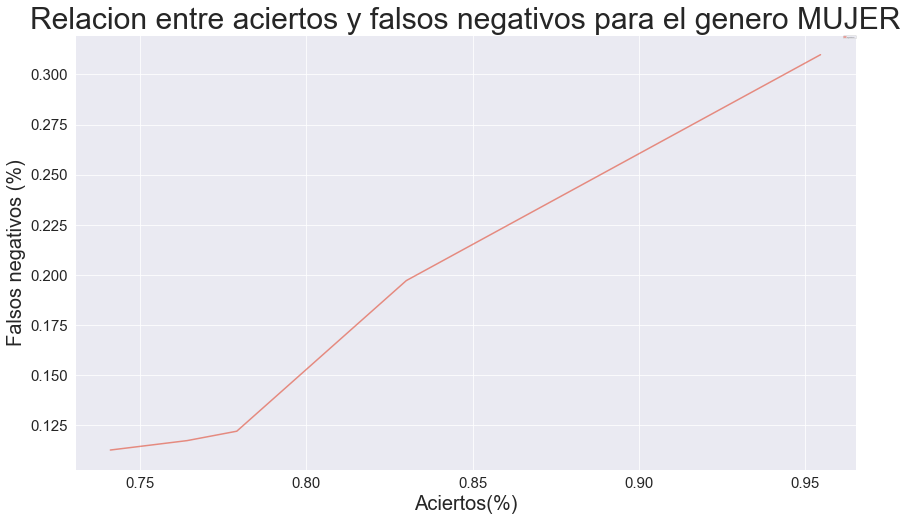

In [695]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.set_color_codes("pastel")
ax = df_mujer_short.plot.line(figsize = (14,8), fontsize = 15, x='aciertos(%)',alpha=0.6, rot=0)
ax.set_xlabel('Aciertos(%)', fontsize = 20)
ax.set_ylabel('Falsos negativos (%)', fontsize = 20)
ax.set_title('Relacion entre aciertos y falsos negativos para el genero MUJER', fontsize = 30)
ax.legend(fontsize = 0)

Como se puede ver, el aumento en la precision conlleva un costo que se traduce en el incremento de falsos negativos, es decir, registros descartados que NO deberian haber sido descartados. Podemos observar que hasta poco menos de 78% de *accuracy* el porcentaje de falsos negativos era bajisimo. No obstante, a partir de entonces, el incremento en los falsos negativos es mas pronunciado, aunque los valores porcentuale de dicha variable se mantiene bajos (alrededor del 30% para una *accuracy* de mas del 95%)

### <font color='purple'>**RAMA: HOMBRE**</font>

In [696]:
#Generamos un dataframe de solo hombres para analizar la evolucion de los candidatos conociendo el target
columna_encabezados = ['volverian', 'no_volverian','aciertos(%)','falsos_positivos(%)','falsos_negativos(%)']
discriminante = ['hombre','sede','amigos','parientes','ticket','sala','edad']
df_hombre = pd.DataFrame(index = discriminante, columns=columna_encabezados)
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,NaN,NaN,NaN,NaN,NaN
sede,NaN,NaN,NaN,NaN,NaN
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


In [697]:
#Rama: candidatos hombres
candidatos_hombre = train_df_features.loc[train_df_features['genero'] == 'hombre']
cantidad_volveria_hombre = len(candidatos_hombre.index)
print('Hay un total de ' + str(cantidad_volveria_hombre) + ' registros del genero HOMBRE en los datos' )

Hay un total de 513 registros del genero HOMBRE en los datos


**ANALISIS DE ACCURACY - hombre**

Usamos la informacion en el dataframe que contiene el *target* para analizar cuantos de los registros *hombre* volverian y cuantos no

In [698]:
#Analizamos 
target_candidatos_hombre = pd.merge(candidatos_hombre,train_df_values, on = 'id_usuario')
target_candidatos_hombre = target_candidatos_hombre.loc[target_candidatos_hombre['volveria']==1]
target_candidatos_hombre = len(target_candidatos_hombre)
df_hombre.loc['hombre','volverian'] = target_candidatos_hombre
df_hombre.loc['hombre','no_volverian'] = cantidad_volveria_hombre - target_candidatos_hombre

# no desechamos ningun registro del subset "mujer", solo inicializamos los valores aciertos, falsos_positivos y falsos_negativos
df_hombre.loc['hombre','aciertos(%)'] = 100
df_hombre.loc['hombre','falsos_positivos(%)'] = 0
df_hombre.loc['hombre','falsos_negativos(%)'] = 0
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,NaN,NaN,NaN,NaN,NaN
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


<font color='purple'>**RAMA: HOMBRE-->SEDE**</font>

In [699]:
#Subrama hombre: nombre de la sede
candidatos_hombre_sede = candidatos_hombre.loc[candidatos_hombre['nombre_sede']!='fiumark_quilmes']
cantidad_volveria_hombre_sede = len(candidatos_hombre_sede.index)
print('Excluyendo a la sede de FiuMark Quilmes, obtenemos ' + str(cantidad_volveria_hombre_sede) + ' registros candidatos')

Excluyendo a la sede de FiuMark Quilmes, obtenemos 475 registros candidatos


**ANALISIS DE ACCURACY - hombre por SEDE**

In [700]:
#Analizamos 
target_candidatos_hombre_sede = pd.merge(candidatos_hombre_sede,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede = target_candidatos_hombre_sede.loc[target_candidatos_hombre_sede['volveria']==1]
target_candidatos_hombre_sede = len(target_candidatos_hombre_sede)
df_hombre.loc['sede','volverian'] = target_candidatos_hombre_sede
df_hombre.loc['sede','no_volverian'] = cantidad_volveria_hombre_sede - target_candidatos_hombre_sede

df_hombre.loc['sede','aciertos(%)'] = target_candidatos_hombre_sede/cantidad_volveria_hombre_sede
df_hombre.loc['sede','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede - target_candidatos_hombre_sede)/cantidad_volveria_hombre_sede
df_hombre.loc['sede','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['sede','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,NaN,NaN,NaN,NaN,NaN
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


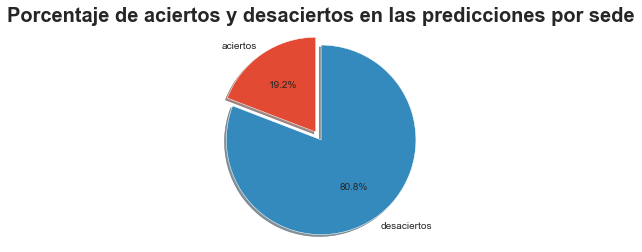

In [701]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[1,0], df_hombre.iloc[1,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por sede', fontweight = 'semibold', fontsize = 20)
plt.show()


El porcentaje de aciertos es bajo, aunque el porcentaje de falsos negativos es infimo (0.0319149%) por lo que podemos afirmar que el criterio de filtrado por sede resulta bueno. Hay que destacar que las cantidades absolutas de aciertos y desaciertos es dispareja: se puede ver facilmente que mas del 80% de los encuestados hombres no tiene intencion de volver. La naturaleza del problema hace que la seleccion de candidatos sea dificil y la mejora en el porcentaje de aciertos conlleve un alto coste (aumento de falsos negativos).

<font color='purple'>**RAMA: HOMBRE-->SEDE-->AMIGOS**</font>

In [702]:
#Subrama hombre, subrama Chacarita/Palermo: amigos
candidatos_hombre_sede_amigos = candidatos_hombre_sede.loc[candidatos_hombre_sede['amigos']<3]
cantidad_volveria_hombre_sede_amigos = len(candidatos_hombre_sede_amigos.index)
print('Excluyendo a los grupos mayores a 3 amigos, obtenemos ' + str(cantidad_volveria_hombre_sede_amigos) + ' registros candidatos')

Excluyendo a los grupos mayores a 3 amigos, obtenemos 457 registros candidatos


**ANALISIS DE ACCURACY - hombre por sede por AMIGOS**

In [703]:
#Analizamos 
target_candidatos_hombre_sede_amigos = pd.merge(candidatos_hombre_sede_amigos,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede_amigos = target_candidatos_hombre_sede_amigos.loc[target_candidatos_hombre_sede_amigos['volveria']==1]
target_candidatos_hombre_sede_amigos = len(target_candidatos_hombre_sede_amigos)
df_hombre.loc['amigos','volverian'] = target_candidatos_hombre_sede_amigos
df_hombre.loc['amigos','no_volverian'] = cantidad_volveria_hombre_sede_amigos - target_candidatos_hombre_sede_amigos

df_hombre.loc['amigos','aciertos(%)'] = target_candidatos_hombre_sede_amigos/cantidad_volveria_hombre_sede_amigos
df_hombre.loc['amigos','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede_amigos - target_candidatos_hombre_sede_amigos)/cantidad_volveria_hombre_sede_amigos
df_hombre.loc['amigos','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['amigos','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,90,367,0.196937,0.803063,0.0425532
parientes,NaN,NaN,NaN,NaN,NaN
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


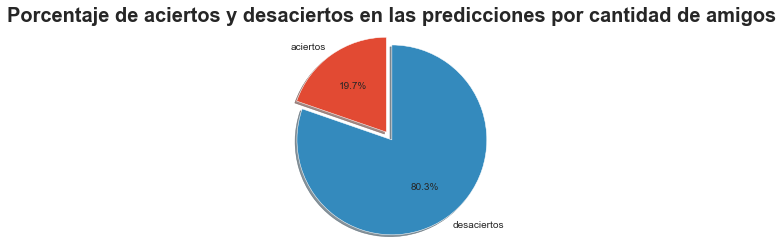

In [704]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[2,0], df_hombre.iloc[2,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por cantidad de amigos', fontweight = 'semibold', fontsize = 20)
plt.show()

Observacion: Tal como se ha previsto, se ve una pequena mejora y se ha logrado mantener un costo despreciable.

<font color='purple'>**RAMA: HOMBRE-->SEDE-->AMIGOS-->PARIENTES**</font>

In [705]:
#Subrama hombre, subrama Chacarita/Palermo, subrama amigos: parientes
candidatos_hombre_sede_amigos_parientes = candidatos_hombre_sede_amigos.loc[candidatos_hombre_sede_amigos['parientes']<3]
cantidad_volveria_hombre_sede_amigos_parientes = len(candidatos_hombre_sede_amigos_parientes.index)
print('Excluyendo a los grupos mayores a 3 parientes, obtenemos ' + str(cantidad_volveria_hombre_sede_amigos_parientes) + ' registros candidatos')

Excluyendo a los grupos mayores a 3 parientes, obtenemos 454 registros candidatos


**ANALISIS DE ACCURACY - hombre por sede por amigos por PARIENTES**

In [706]:
#Analizamos 
target_candidatos_hombre_sede_amigos_parientes = pd.merge(candidatos_hombre_sede_amigos_parientes,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede_amigos_parientes = target_candidatos_hombre_sede_amigos_parientes.loc[target_candidatos_hombre_sede_amigos_parientes['volveria']==1]
target_candidatos_hombre_sede_amigos_parientes = len(target_candidatos_hombre_sede_amigos_parientes)
df_hombre.loc['parientes','volverian'] = target_candidatos_hombre_sede_amigos_parientes
df_hombre.loc['parientes','no_volverian'] = cantidad_volveria_hombre_sede_amigos_parientes - target_candidatos_hombre_sede_amigos_parientes

df_hombre.loc['parientes','aciertos(%)'] = target_candidatos_hombre_sede_amigos_parientes/cantidad_volveria_hombre_sede_amigos_parientes
df_hombre.loc['parientes','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede_amigos_parientes - target_candidatos_hombre_sede_amigos_parientes)/cantidad_volveria_hombre_sede_amigos_parientes
df_hombre.loc['parientes','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['parientes','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,90,367,0.196937,0.803063,0.0425532
parientes,90,364,0.198238,0.801762,0.0425532
ticket,NaN,NaN,NaN,NaN,NaN
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


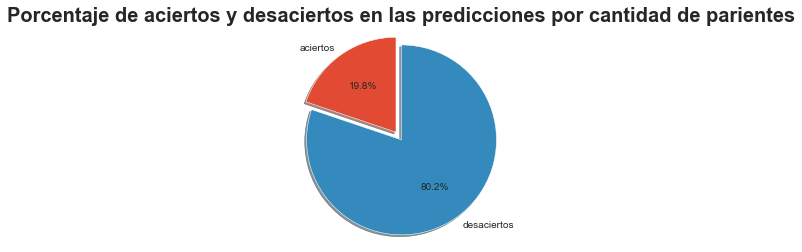

In [707]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[3,0], df_hombre.iloc[3,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por cantidad de parientes', fontweight = 'semibold', fontsize = 20)
plt.show()

Nuevamente, se ve una leve mejora con respecto al anterior filtrado.

<font color='purple'>**RAMA: HOMBRE-->SEDE-->AMIGOS-->PARIENTES-->PRECIO**</font>

In [708]:
#Subrama hombre, subrama Chacarita/Palermo, subrama amigos, subrama parientes: precio ticket
candidatos_hombre_sede_amigos_parientes_ticket = candidatos_hombre_sede_amigos_parientes.loc[(candidatos_hombre_sede_amigos_parientes['precio_ticket']>1)]
cantidad_volveria_hombre_sede_amigos_parientes_ticket = len(candidatos_hombre_sede_amigos_parientes_ticket.index)
print('Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos ' + str(cantidad_volveria_hombre_sede_amigos_parientes_ticket) + ' registros')

Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos 226 registros


**ANALISIS DE ACCURACY - hombre por sede por amigos por parientes por TICKET**

In [709]:
#Analizamos 
target_candidatos_hombre_sede_amigos_parientes_ticket = pd.merge(candidatos_hombre_sede_amigos_parientes_ticket,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede_amigos_parientes_ticket = target_candidatos_hombre_sede_amigos_parientes_ticket.loc[target_candidatos_hombre_sede_amigos_parientes_ticket['volveria']==1]
target_candidatos_hombre_sede_amigos_parientes_ticket = len(target_candidatos_hombre_sede_amigos_parientes_ticket)
df_hombre.loc['ticket','volverian'] = target_candidatos_hombre_sede_amigos_parientes_ticket
df_hombre.loc['ticket','no_volverian'] = cantidad_volveria_hombre_sede_amigos_parientes_ticket - target_candidatos_hombre_sede_amigos_parientes_ticket


df_hombre.loc['ticket','aciertos(%)'] = target_candidatos_hombre_sede_amigos_parientes_ticket/cantidad_volveria_hombre_sede_amigos_parientes_ticket
df_hombre.loc['ticket','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede_amigos_parientes_ticket - target_candidatos_hombre_sede_amigos_parientes_ticket)/cantidad_volveria_hombre_sede_amigos_parientes_ticket
df_hombre.loc['ticket','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['ticket','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,90,367,0.196937,0.803063,0.0425532
parientes,90,364,0.198238,0.801762,0.0425532
ticket,66,160,0.292035,0.707965,0.297872
sala,NaN,NaN,NaN,NaN,NaN
edad,NaN,NaN,NaN,NaN,NaN


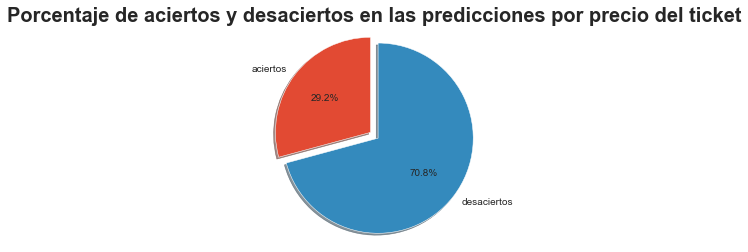

In [710]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[4,0], df_hombre.iloc[4,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por precio del ticket', fontweight = 'semibold', fontsize = 20)
plt.show()

Esta vez la mejora fue notable, aunque el costo de tal mejora tambien fue significativo.

<font color='purple'>**RAMA: HOMBRE-->SEDE-->AMIGOS-->PARIENTES-->PRECIO-->SALA**</font>

In [711]:
#Subrama hombre, subrama Chacarita/Palermo, subrama amigos, subrama parientes, subrama precio ticket: sala
candidatos_hombre_sede_amigos_parientes_ticket_sala = candidatos_hombre_sede_amigos_parientes_ticket.loc[(candidatos_hombre_sede_amigos_parientes_ticket['tipo_de_sala']!='3d')]
cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala = len(candidatos_hombre_sede_amigos_parientes_ticket_sala.index)
print('Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos ' + str(cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala) + ' registros')

Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos 136 registros


**ANALISIS DE ACCURACY - hombre por sede por amigos por parientes por ticket por SALA**

In [712]:
#Analizamos 
target_candidatos_hombre_sede_amigos_parientes_ticket_sala = pd.merge(candidatos_hombre_sede_amigos_parientes_ticket_sala,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede_amigos_parientes_ticket_sala = target_candidatos_hombre_sede_amigos_parientes_ticket_sala.loc[target_candidatos_hombre_sede_amigos_parientes_ticket_sala['volveria']==1]
target_candidatos_hombre_sede_amigos_parientes_ticket_sala = len(target_candidatos_hombre_sede_amigos_parientes_ticket_sala)
df_hombre.loc['sala','volverian'] = target_candidatos_hombre_sede_amigos_parientes_ticket_sala
df_hombre.loc['sala','no_volverian'] = cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala - target_candidatos_hombre_sede_amigos_parientes_ticket_sala


df_hombre.loc['sala','aciertos(%)'] = target_candidatos_hombre_sede_amigos_parientes_ticket_sala/cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala
df_hombre.loc['sala','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala - target_candidatos_hombre_sede_amigos_parientes_ticket_sala)/cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala
df_hombre.loc['sala','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['sala','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,90,367,0.196937,0.803063,0.0425532
parientes,90,364,0.198238,0.801762,0.0425532
ticket,66,160,0.292035,0.707965,0.297872
sala,50,86,0.367647,0.632353,0.468085
edad,NaN,NaN,NaN,NaN,NaN


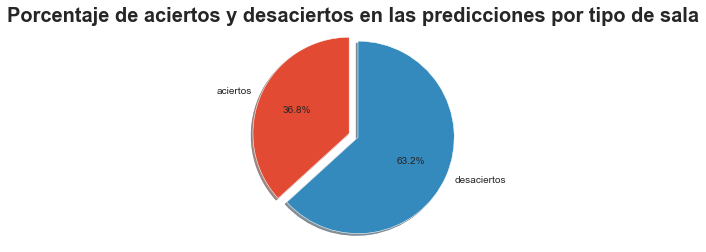

In [713]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[5,0], df_hombre.iloc[5,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por tipo de sala', fontweight = 'semibold', fontsize = 20)
plt.show()

En este caso la mejora resulta aun mejor. Sin embargo, notamos que llevamos un costo acumulado cercano al 50%

<font color='purple'>**RAMA: HOMBRE-->SEDE-->AMIGOS-->PARIENTES-->PRECIO-->SALA-->EDAD**</font>

In [714]:
#Subrama hombre, subrama Chacarita/Palermo, subrama amigos, subrama parientes, subrama precio ticket, subrama sala: edad
candidatos_hombre_sede_amigos_parientes_ticket_sala_edad = candidatos_hombre_sede_amigos_parientes_ticket_sala.loc[(candidatos_hombre_sede_amigos_parientes_ticket_sala['edad']<65) ]#& (candidatos_hombre_sede_amigos_parientes_ticket_sala['edad']>30)]
cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad = len(candidatos_hombre_sede_amigos_parientes_ticket_sala_edad.index)
print('Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos ' + str(cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad) + ' registros')

Excluyendo a los clientes que adquirieron la categoria 1 de precios, obtenemos 100 registros


**ANALISIS DE ACCURACY - hombre por sede por amigos por parientes por ticket por sala por EDAD**

In [715]:
#Analizamos 
target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad = pd.merge(candidatos_hombre_sede_amigos_parientes_ticket_sala_edad,train_df_values, on = 'id_usuario')
target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad = target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad.loc[target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad['volveria']==1]
target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad = len(target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad)
df_hombre.loc['edad','volverian'] = target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad
df_hombre.loc['edad','no_volverian'] = cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad - target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad


df_hombre.loc['edad','aciertos(%)'] = target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad/cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad
df_hombre.loc['edad','falsos_positivos(%)'] = (cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad - target_candidatos_hombre_sede_amigos_parientes_ticket_sala_edad)/cantidad_volveria_hombre_sede_amigos_parientes_ticket_sala_edad
df_hombre.loc['edad','falsos_negativos(%)'] = (df_hombre.loc['hombre','volverian']-df_hombre.loc['edad','volverian'])/df_hombre.loc['hombre','volverian']
df_hombre

,volverian,no_volverian,aciertos(%),falsos_positivos(%),falsos_negativos(%)
hombre,94,419,100,0,0
sede,91,384,0.191579,0.808421,0.0319149
amigos,90,367,0.196937,0.803063,0.0425532
parientes,90,364,0.198238,0.801762,0.0425532
ticket,66,160,0.292035,0.707965,0.297872
sala,50,86,0.367647,0.632353,0.468085
edad,40,60,0.4,0.6,0.574468


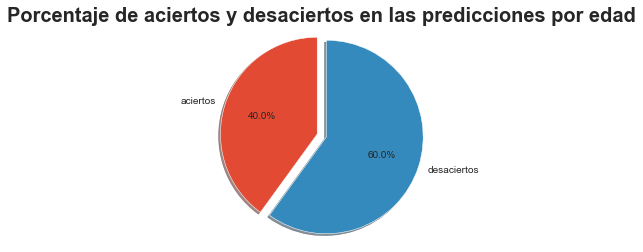

In [716]:
#Grafica
labels = 'aciertos', 'desaciertos'
sns.set_color_codes("pastel")
sizes = [df_hombre.iloc[6,0], df_hombre.iloc[6,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de aciertos y desaciertos en las predicciones por edad', fontweight = 'semibold', fontsize = 20)
plt.show()

Nuevamente se aprecia una mejora en el porcentaje de aciertos pero el costo acumulado esta cercano al 60%. Esto implica que de seguir filtrando perderiamos gran parte de los registros de interes y aunque el porcentaje fuese bueno, dejaria de lado demasiados datos que importan al problema. 

Al igual que se hizo con el conjunto de encuenstados del genero **mujer**, nos interesa conocer la evolucion del costo en funcion de la precision ganada.

In [717]:
df_hombre_short = df_hombre.reset_index()
df_hombre_short = df_hombre_short[['aciertos(%)','falsos_negativos(%)']]
df_hombre_short = df_hombre_short.iloc[1:,:]
df_hombre_short

,aciertos(%),falsos_negativos(%)
1,0.191579,0.0319149
2,0.196937,0.0425532
3,0.198238,0.0425532
4,0.292035,0.297872
5,0.367647,0.468085
6,0.4,0.574468


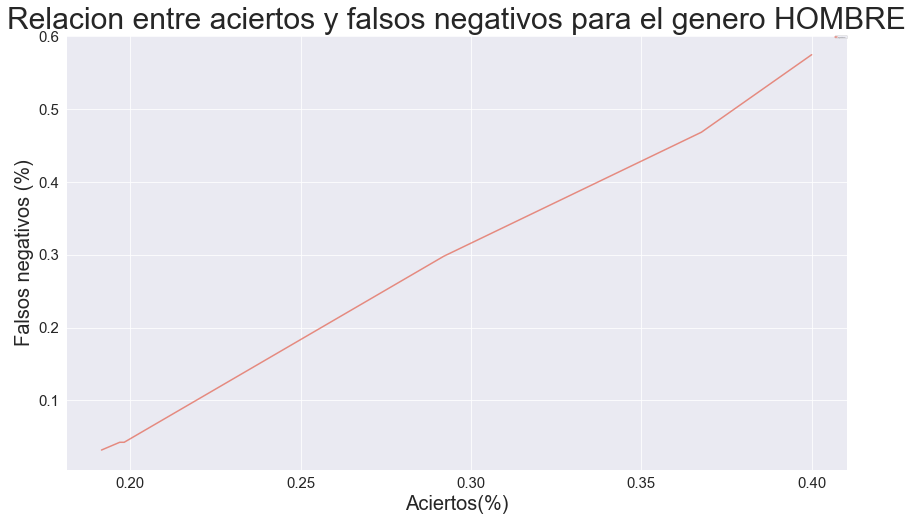

In [718]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.set_color_codes("pastel")
ax = df_hombre_short.plot.line(figsize = (14,8), fontsize = 15, x='aciertos(%)',alpha=0.6, rot=0)
ax.set_xlabel('Aciertos(%)', fontsize = 20)
ax.set_ylabel('Falsos negativos (%)', fontsize = 20)
ax.set_title('Relacion entre aciertos y falsos negativos para el genero HOMBRE', fontsize = 30)
ax.legend(fontsize = 0)

A diferencia de lo que ocurria con el conjunto del genero MUJER, se ha logrado mantener la variacion entre los **aciertos** y los **falsos negativos**. Sin embargo, la velocidad de crecimiento en este caso es mucho mas rapida que en el caso anterior. Como ya se ha contado, esta diferencia fuerte deriva en la distribucion de la cantidad de personas de ambos generos dispuestos a repetir la experiencia cinefila en uno de los cines de FiuMark.

## Baseline

In [719]:
def baseline(df):
    candidatos_mujer = df.loc[(df['genero'] == 'mujer')&(df['nombre_sede']!='fiumark_quilmes')&(df['amigos']<4)&(df['parientes']<4)&(df['precio_ticket']>1)&(df['tipo_de_sala']!='4d')]
    list_candidatos_mujer_ID = candidatos_mujer['id_usuario']
    
    candidatos_hombre = df.loc[(df['genero'] == 'hombre')&(df['nombre_sede']!='fiumark_quilmes')&(df['amigos']<3)&(df['parientes']<3)&(df['precio_ticket']>1)&(df['tipo_de_sala']!='3d')&(df['edad']<65)]
    list_candidatos_hombre_ID = candidatos_hombre['id_usuario']
    list_candidatos = [*list_candidatos_mujer_ID, *list_candidatos_hombre_ID]
    return list_candidatos

In [720]:
# Muestra del funcionamiento de la funcion baseline
candidatos = baseline(train_df_features)
candidatos

[880,
 866,
 881,
 609,
 855,
 527,
 257,
 444,
 709,
 300,
 458,
 438,
 196,
 162,
 517,
 191,
 572,
 212,
 578,
 137,
 707,
 67,
 628,
 347,
 721,
 524,
 810,
 854,
 381,
 731,
 499,
 313,
 298,
 447,
 436,
 12,
 690,
 582,
 270,
 775,
 718,
 642,
 797,
 766,
 311,
 616,
 867,
 152,
 701,
 260,
 376,
 711,
 717,
 592,
 200,
 670,
 764,
 417,
 821,
 4,
 521,
 541,
 330,
 802,
 328,
 310,
 390,
 320,
 388,
 273,
 99,
 324,
 428,
 843,
 751,
 216,
 358,
 748,
 559,
 54,
 400,
 312,
 259,
 384,
 338,
 53,
 308,
 538,
 44,
 291,
 557,
 830,
 872,
 346,
 782,
 531,
 519,
 394,
 536,
 577,
 888,
 597,
 581,
 863,
 427,
 248,
 610,
 167,
 89,
 326,
 269,
 760,
 474,
 195,
 441,
 292,
 319,
 671,
 357,
 231,
 258,
 652,
 487,
 57,
 586,
 62,
 219,
 540,
 367,
 178,
 507,
 370,
 459,
 601,
 619,
 875,
 59,
 780,
 16,
 124,
 514,
 317,
 418,
 505,
 85,
 10,
 850,
 547,
 342,
 2,
 473,
 743,
 755,
 636,
 225,
 510,
 126,
 742,
 463,
 156,
 749,
 699,
 490,
 789,
 890,
 516,
 170,
 660,
 111,
 60

# FIN DEL ANALISIS